# Students ID

Student Name -  <br>
Student id -  <br>
Contact e-mail -  <br>

Student Name -  <br>
Student id -  <br>
Contact e-mail - t <br>

Student Name -  <br>
Student id -  <br>
Contact e-mail -  <br>

Student Name -  <br>
Student id -  <br>
Contact e-mail -  <br>

Student Name -  <br>
Student id -  <br>
Contact e-mail -  <br>

# Import the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler

from scipy import stats
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier, Pool
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV

from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Context

Workers' compensation for workplace injuries in New York are administrated through the Workers' Compensation Board. Due to the fact that over 5 million claims have been processed since the year 2000, assessing claims manually is very time-consuming. The purpose of this project is to apply machine learning models, taking claims from 2020 to 2022, to conduct automated claim evaluations aimed at speeding up decision-making on new claims and enhancing WCB efficiency in handling compensation processes.

In [2]:
df = pd.read_csv('train_data.csv')

C:\Users\tomas\AppData\Local\Temp\ipykernel_31376\2996860013.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train_data.csv')


In [3]:
df['Claim Injury Type'].value_counts()

Claim Injury Type
2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: count, dtype: int64

# Reading the Data

In [4]:
df = pd.read_csv('train_data.csv')

C:\Users\tomas\AppData\Local\Temp\ipykernel_31376\2996860013.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train_data.csv')


We should pay attention to the message that appears when importing the data. It's telling us that column 29 has mixed data types. We will check that out further on.

# Metadata

- **Accident Date**: Injury date of the claim.
- **Age at Injury**: Age of injured worker when the injury occurred.
- **Alternative Dispute Resolution**: Adjudication processes external to the Board.
- **Assembly Date**: The date the claim was first assembled.
- **Attorney/Representative**: Whether the claim is being represented by an attorney.
- **Average Weekly Wage**: The wage used to calculate workers’ compensation, disability, or paid leave wage replacement benefits.
- **Birth Year**: The reported year of birth of the injured worker.
- **C-2 Date**: Date of receipt of the Employer's Report of Work-Related Injury/Illness or equivalent (formerly Form C-2).
- **C-3 Date**: Date Form C-3 (Employee Claim Form) was received.
- **Carrier Name**: Name of the primary insurance provider responsible for providing workers’ compensation coverage to the injured worker’s employer.
- **Carrier Type**: Type of primary insurance provider responsible for providing workers’ compensation coverage.
- **Claim Identifier**: Unique identifier for each claim, assigned by WCB.
- **County of Injury**: Name of the New York County where the injury occurred.
- **COVID-19 Indicator**: Indicates if the claim may be associated with COVID-19.
- **District Name**: Name of the WCB district office that oversees claims for that region or area of the state.
- **First Hearing Date**: Date the first hearing was held on a claim at a WCB hearing location. A blank date means the claim has not yet had a hearing.
- **Gender**: The reported gender of the injured worker.
- **IME-4 Count**: Number of IME-4 forms received per claim. The IME-4 form is the "Independent Examiner's Report of Independent Medical Examination."
- **Industry Code**: NAICS code and descriptions are available at [NAICS Search](https://www.naics.com/search-naics-codes-by-industry/).
- **Industry Code Description**: 2-digit NAICS industry code description used to classify businesses according to their economic activity.
- **Medical Fee Region**: Approximate region where the injured worker would receive medical services.
- **OIICS Nature of Injury Description**: The OIICS nature of injury codes & descriptions are available at [BLS OIICS Manual](https://www.bls.gov/iif/oiics_manual_2007.pdf).
- **WCIO Cause of Injury Code**: The WCIO cause of injury codes & descriptions are available at [WCIO Cause Table](https://www.wcio.org/Active%20PNC/WCIO_Cause_Table.pdf).
- **WCIO Cause of Injury Description**: See description of field above.
- **WCIO Nature of Injury Code**: The WCIO nature of injury codes & descriptions are available at [WCIO Nature Table](https://www.wcio.org/Active%20PNC/WCIO_Nature_Table.pdf).
- **WCIO Nature of Injury Description**: See description of field above.
- **WCIO Part of Body Code**: The WCIO part of body codes & descriptions are available at [WCIO Part Table](https://www.wcio.org/Active%20PNC/WCIO_Part_Table.pdf).
- **WCIO Part of Body Description**: See description of field above.
- **Zip Code**: The reported ZIP code of the injured worker’s home address.
- **Agreement Reached**: Binary variable: Yes if there is an agreement without the involvement of the WCB (unknown at the start of a claim).
- **WCB Decision**: Multiclass variable: Decision of the WCB relative to the claim: "Accident" means that the claim refers to a workplace accident; "Occupational Disease" means illness from the workplace; requires WCB deliberation, so it is unknown at the start of a claim.
- **Claim Injury Type**: Main target variable: Deliberation of the WCB relative to benefits awarded to the claim. Numbering indicates severity.
.

# Initial Analysis

In [5]:
df.shape

(593471, 33)

We have 33 variables and 593471 observations.

In [6]:
df.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'OIICS Nature of Injury Description',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'WCB Decision', 'Number of Dependents'],
      dtype='object')

In [7]:
df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

## Descriptive statistics for numerical variables:

In [9]:
df.describe()

,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,IME-4 Count,Industry Code,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
count,574026.000000,5.453750e+05,544948.000000,5.934710e+05,132803.000000,564068.000000,0.0,558386.000000,558369.000000,556944.000000,574026.000000,574026.000000
mean,42.114270,4.910883e+02,1886.767604,2.366760e+07,3.207337,58.645305,NaN,54.381143,41.013839,39.738146,0.046665,3.006559
std,14.256432,6.092918e+03,414.644423,1.079271e+08,2.832303,19.644175,NaN,25.874281,22.207521,22.365940,0.210921,2.000801
min,0.000000,0.000000e+00,0.000000,5.393066e+06,1.000000,11.000000,NaN,1.000000,1.000000,-9.000000,0.000000,0.000000
25%,31.000000,0.000000e+00,1965.000000,5.593414e+06,1.000000,45.000000,NaN,31.000000,16.000000,33.000000,0.000000,1.000000
50%,42.000000,0.000000e+00,1977.000000,5.791212e+06,2.000000,61.000000,NaN,56.000000,49.000000,38.000000,0.000000,3.000000
75%,54.000000,8.410000e+02,1989.000000,5.991000e+06,4.000000,71.000000,NaN,75.000000,52.000000,53.000000,0.000000,5.000000
max,117.000000,2.828079e+06,2018.000000,9.998917e+08,73.000000,92.000000,NaN,99.000000,91.000000,99.000000,1.000000,6.000000


**Observations:**
  - Values like 0 in 'Age at Injury' may indicate data errors or incomplete records.
  - The mean birth year is approximately 1886, which might be skewed by invalid entries such as 0.
  - The column 'OIICS Nature of Injury Description' is entirely missing, which might justify excluding it unless additional data becomes available.
  - Given that most values in 'Agreement Reached' are zero, a large portion of claims may not have reached an agreement.

## Dividing the columns dtypes so that it is easier to work:

In [10]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

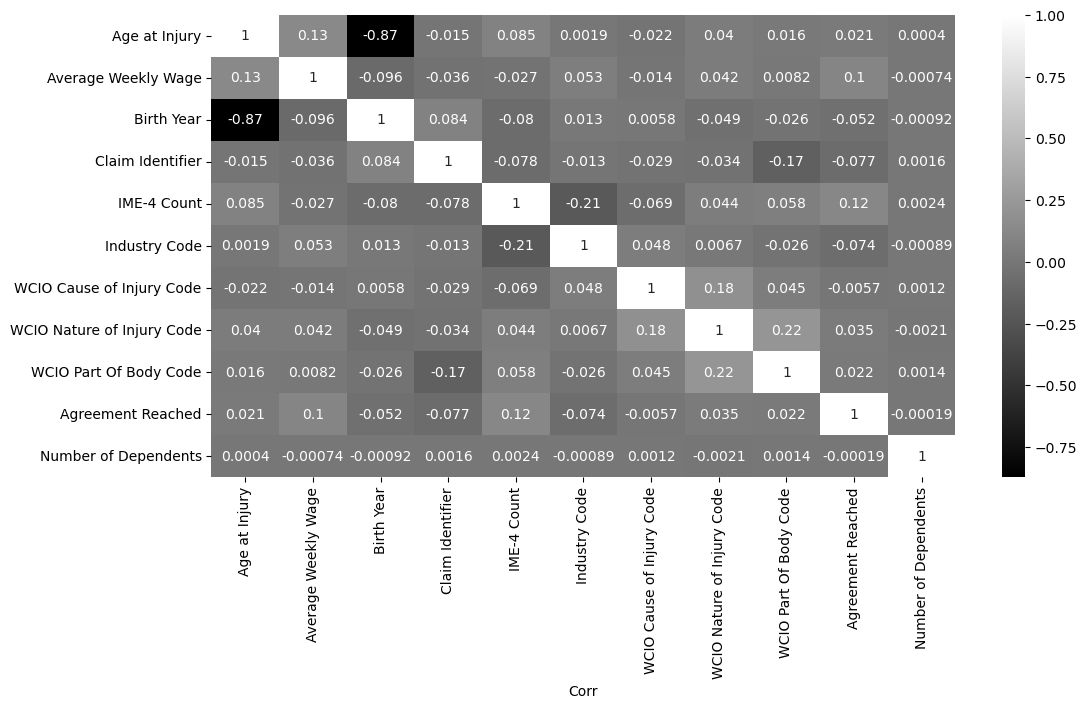

In [11]:
figure = plt.figure(figsize=(12, 6))
sns.heatmap(df[numerical_columns].drop(columns = 'OIICS Nature of Injury Description').corr(method='spearman'), annot=True,cmap=plt.cm.gray)

plt.xlabel('Corr')
plt.show()

There is a strong negative correlation between Age at Injury and Birth Year in the correlation heat map. This was expected since Birth Year and Age at Injury are intrinsically connected with one another -for each claim, Birth Year will be related to, and therefore determine, the Age at Injury.

In feature selection, based on this dependency, we would be better off removing either of these variables to avoid duplication and, consequently, any multicollinearity issues that might arise. In this scenario, Age at Injury will be more informative since it's a direct measure with reference to the risk factors and recovery of the worker concerned. However, this shall be determined by further experimentation with the model and assessment of its performance.

## Statistics describing categorical variables:

In [12]:
df.describe(include='object')

,Accident Date,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,...,District Name,First Hearing Date,Gender,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Description,WCIO Nature of Injury Description,WCIO Part Of Body Description,Zip Code,WCB Decision
count,570337,574026,593471,574026,559466,187245,574026,574026,574026,574026,...,574026,150798,574026,564068,574026,558386,558369,556944,545389,574026
unique,5539,3,1096,2,2475,1648,2046,8,8,63,...,8,1094,4,20,5,74,56,54,10060,1
top,2020-03-01,N,2020-03-06,N,2021-05-11,2021-04-21,STATE INSURANCE FUND,1A. PRIVATE,2. NON-COMP,SUFFOLK,...,NYC,2022-04-15,M,HEALTH CARE AND SOCIAL ASSISTANCE,IV,LIFTING,STRAIN OR TEAR,LOWER BACK AREA,11236,Not Work Related
freq,1245,571412,1422,392291,1847,350,111144,285368,291078,60430,...,270779,440,335218,114339,265981,46610,153373,51862,3302,574026


## Check for duplicates rows

In [13]:
df.duplicated().sum()

0

## Check for data incoherences

In [14]:
df['Alternative Dispute Resolution'].unique()

array(['N', nan, 'Y', 'U'], dtype=object)

In [15]:
df['Gender'].unique()

array(['M', 'F', nan, 'U', 'X'], dtype=object)

In [16]:
#Dependent variable
df['Claim Injury Type'].unique()

array(['2. NON-COMP', '4. TEMPORARY', nan, '3. MED ONLY',
       '5. PPD SCH LOSS', '6. PPD NSL', '1. CANCELLED', '8. DEATH',
       '7. PTD'], dtype=object)

In [17]:
df['Claim Injury Type'].isnull().sum()

19445

## Possible problems

- 'Alternative Dispute Resolution' has weird values'U'.

- 'Age at Injury' should be an int.

- 'Birth Year' should be an int.

- 'Industry Code' should probably be an int cause it only has 2 digits?

## Relevant info
- Claim injury type is the dependent variable, number indicates severity (there are 8 levels and some nan values).

- It looks like some rows are missing too much information (should check that).

- Claim identifier is unique and there are no null values so could be used as index.


# Clean and Pre-Process the Data

This is a really important step, wherein we prepared our dataset for modeling by handling null values, unusual values, or outliers to make our data consistent and reliable. We rectified feature data types where ever necessary, encoded categorical variables in a form understandable to machine learning algorithms, and then scaled the numerical features in order to keep consistency throughout the dataset. These steps refine the data, enabling the model to learn the pattern better and hence perform consistently on new claims data prediction.

## Handling Missing Values

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

**Percentage of null values per variable:**

In [19]:
df.isnull().mean()

Accident Date                         0.038981
Age at Injury                         0.032765
Alternative Dispute Resolution        0.032765
Assembly Date                         0.000000
Attorney/Representative               0.032765
Average Weekly Wage                   0.081042
Birth Year                            0.081761
C-2 Date                              0.057299
C-3 Date                              0.684492
Carrier Name                          0.032765
Carrier Type                          0.032765
Claim Identifier                      0.000000
Claim Injury Type                     0.032765
County of Injury                      0.032765
COVID-19 Indicator                    0.032765
District Name                         0.032765
First Hearing Date                    0.745905
Gender                                0.032765
IME-4 Count                           0.776227
Industry Code                         0.049544
Industry Code Description             0.049544
Medical Fee R

In [20]:
df['OIICS Nature of Injury Description'].info()
#all values are null so we should drop this column
df.drop(columns=['OIICS Nature of Injury Description'], inplace=True)

<class 'pandas.core.series.Series'>
RangeIndex: 593471 entries, 0 to 593470
Series name: OIICS Nature of Injury Description
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 4.5 MB


A large number of variables in this dataset share the same missing value percentage, which is 3.28%. A possible interpretation is that these columns might show some pattern in their missing data, perhaps because of common causes that affect the ways data were entered or some kind of record-keeping process.

We can check whether the NaNs are consistent across these variables. That is, we can take one of these variables in this set,County of Injuryry", drop rows containing NaN for that variable and then check whether this removes missing values for all the rest of the variables in that percentage.

In [21]:
df = df.dropna(subset=["County of Injury"])

In [22]:
df.isnull().mean()

Accident Date                        0.006427
Age at Injury                        0.000000
Alternative Dispute Resolution       0.000000
Assembly Date                        0.000000
Attorney/Representative              0.000000
Average Weekly Wage                  0.049912
Birth Year                           0.050656
C-2 Date                             0.025365
C-3 Date                             0.673804
Carrier Name                         0.000000
Carrier Type                         0.000000
Claim Identifier                     0.000000
Claim Injury Type                    0.000000
County of Injury                     0.000000
COVID-19 Indicator                   0.000000
District Name                        0.000000
First Hearing Date                   0.737298
Gender                               0.000000
IME-4 Count                          0.768646
Industry Code                        0.017348
Industry Code Description            0.017348
Medical Fee Region                

This confirms that the missing data pattern is indeed consistent across these variables.

We should also check null values of First Hearing Date and IME-4 Count since both have over 70% null values.

### Check which columns have more than one data type:

In [23]:
df.apply(lambda col: pd.api.types.infer_dtype(col))
#'Zip Code' has more than one data type

Accident Date                          string
Age at Injury                        floating
Alternative Dispute Resolution         string
Assembly Date                          string
Attorney/Representative                string
Average Weekly Wage                  floating
Birth Year                           floating
C-2 Date                               string
C-3 Date                               string
Carrier Name                           string
Carrier Type                           string
Claim Identifier                      integer
Claim Injury Type                      string
County of Injury                       string
COVID-19 Indicator                     string
District Name                          string
First Hearing Date                     string
Gender                                 string
IME-4 Count                          floating
Industry Code                        floating
Industry Code Description              string
Medical Fee Region                

In [24]:
#What are the data types
df['Zip Code'].apply(type).value_counts()
#this is not taking null values into account
#NaN are usually stored as floats

Zip Code
<class 'str'>      530364
<class 'float'>     43662
Name: count, dtype: int64

In [25]:
df['Zip Code'].info()

<class 'pandas.core.series.Series'>
Index: 574026 entries, 0 to 593467
Series name: Zip Code
Non-Null Count   Dtype 
--------------   ----- 
545389 non-null  object
dtypes: object(1)
memory usage: 8.8+ MB


In [26]:
#function to separate different types but this time considering null values

def check_column_types(column):
    null_count = column.isnull().sum()  
    type_counts = column.dropna().apply(type).value_counts() 

    type_counts['<NA or None>'] = null_count
    
    return type_counts

check_column_types(df['Zip Code'])

Zip Code
<class 'str'>      530364
<class 'float'>     15025
<NA or None>        28637
Name: count, dtype: int64

In [27]:
check_column_types(df['Claim Injury Type'])

Claim Injury Type
<class 'str'>    574026
<NA or None>          0
Name: count, dtype: int64

### Accident Date

In [28]:
check_column_types(df['Accident Date']) 

Accident Date
<class 'str'>    570337
<NA or None>       3689
Name: count, dtype: int64

In [29]:
#Converting the Accident Date type to datetime
df['Accident Date'] = pd.to_datetime(df['Accident Date'], errors='coerce')

Since only a few values are missing in the column 'Accident Date', we will not drop those rows because they may contain important information. We will see if there is an option to estimate those dates. In this way, we retain most of the information and handle the missing value.

We will calculate the average "days to assembly" and fill in the missing 'Accident Date' values based on the 'Assembly Date'.

In [30]:
df['Assembly Date'] = pd.to_datetime(df['Assembly Date'], errors='coerce')

df['Days to Assembly'] = (df['Assembly Date'] - df['Accident Date']).dt.days

#Calculate the average 'Days to Assembly' ignoring NaNs
average_days_to_assembly = df['Days to Assembly'].mean()

#Fill missing 'Accident Date' based on the average 'Days to Assembly'
df['Accident Date'] = df.apply(
    lambda row: row['Assembly Date'] - pd.Timedelta(days=average_days_to_assembly) 
    if pd.isnull(row['Accident Date']) else row['Accident Date'], 
    axis=1
)

In [31]:
df = df.drop(columns=['Days to Assembly'])

In [32]:
check_column_types(df['Accident Date'])

Accident Date
<class 'pandas._libs.tslibs.timestamps.Timestamp'>    574026
<NA or None>                                               0
Name: count, dtype: int64

### Age at Injury

In [33]:
check_column_types(df['Age at Injury'])

Age at Injury
<class 'float'>    574026
<NA or None>            0
Name: count, dtype: int64

### Alternative Dispute Resolution

In [34]:
check_column_types(df['Alternative Dispute Resolution'])

Alternative Dispute Resolution
<class 'str'>    574026
<NA or None>          0
Name: count, dtype: int64

In [35]:
df['Alternative Dispute Resolution'].value_counts()

Alternative Dispute Resolution
N    571412
Y      2609
U         5
Name: count, dtype: int64

There are 5 rows with 'Unknown'. We will impute these missing values with the mode.

In [36]:
ADR_mode = df['Alternative Dispute Resolution'].mode()[0]

df['Alternative Dispute Resolution'] = df['Alternative Dispute Resolution'].replace('U', ADR_mode)

df['Alternative Dispute Resolution'].value_counts()

Alternative Dispute Resolution
N    571417
Y      2609
Name: count, dtype: int64

### Assembly Date

In [37]:
check_column_types(df['Assembly Date'])

Assembly Date
<class 'pandas._libs.tslibs.timestamps.Timestamp'>    574026
<NA or None>                                               0
Name: count, dtype: int64

### Average Weekly Wage

In [38]:
check_column_types(df['Average Weekly Wage'])

Average Weekly Wage
<class 'float'>    545375
<NA or None>        28651
Name: count, dtype: int64

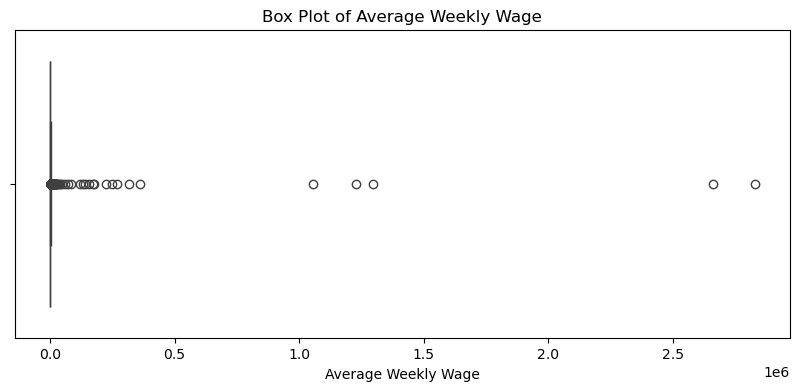

In [39]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Average Weekly Wage'])
plt.title('Box Plot of Average Weekly Wage')
plt.xlabel('Average Weekly Wage')
plt.show()

In [40]:
(df['Average Weekly Wage'] == 0).sum()

335450

Besides the null values, we also found a significant number of '0' values in the 'Average Weekly Wage' column. These '0' values don't make any sense for this data and should be replaced with more applicable value. To handle this, we replace '0' values with NaN and then fill missing values by the mean wage for each combination of 'Industry Code' and 'Carrier Type'. If that is not available, we use the mean for each 'Industry Code' or 'Carrier Type' individually.

In [41]:
df['Average Weekly Wage'].replace(0, np.nan, inplace=True)

wage_mean = df.groupby(['Industry Code', 'Carrier Type'])['Average Weekly Wage'].mean()
wage_mean_industry = df.groupby('Industry Code')['Average Weekly Wage'].mean()
wage_mean_carrier = df.groupby('Carrier Type')['Average Weekly Wage'].mean()

def fill_wage(row):
    if pd.notnull(row['Average Weekly Wage']):
        return row['Average Weekly Wage']
    if pd.notnull(row['Industry Code']) and pd.notnull(row['Carrier Type']):
        return wage_mean.get((row['Industry Code'], row['Carrier Type']), row['Average Weekly Wage'])
    elif pd.notnull(row['Industry Code']):
        return wage_mean_industry.get(row['Industry Code'], row['Average Weekly Wage'])
    elif pd.notnull(row['Carrier Type']):
        return wage_mean_carrier.get(row['Carrier Type'], row['Average Weekly Wage'])
    else:
        return row['Average Weekly Wage']

df['Average Weekly Wage'] = df.apply(fill_wage, axis=1)

C:\Users\tomas\AppData\Local\Temp\ipykernel_31376\351244603.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Average Weekly Wage'].replace(0, np.nan, inplace=True)


In [42]:
check_column_types(df['Average Weekly Wage'])

Average Weekly Wage
<class 'float'>    573793
<NA or None>          233
Name: count, dtype: int64

In [43]:
(df['Average Weekly Wage'] == 0).sum()

0

We will drop those row that has null values on collumns 'Average Weekly Wage', 'Industry Code', and 'Carrier Type'.

In [44]:
df = df.dropna(subset=['Average Weekly Wage'])

In [45]:
check_column_types(df['Average Weekly Wage'])

Average Weekly Wage
<class 'float'>    573793
<NA or None>            0
Name: count, dtype: int64

### Birth Year

In [46]:
check_column_types(df['Birth Year'])

Birth Year
<class 'float'>    544728
<NA or None>        29065
Name: count, dtype: int64

We will remove 'Birth Year' collumn, as it has shown a high correlation with 'Age at Injury' and we are primarily focused on age at injury.

In [47]:
df = df.drop(columns=['Birth Year'])

### C-2 Date

In [48]:
#Converting the C-2 Date type to datetime
df['C-2 Date'] = pd.to_datetime(df['C-2 Date'], errors='coerce')

In [49]:
check_column_types(df['C-2 Date'])

C-2 Date
<class 'pandas._libs.tslibs.timestamps.Timestamp'>    559344
<NA or None>                                           14449
Name: count, dtype: int64

In [50]:
df['C2-Date happened'] = df['C-2 Date'].apply(lambda x: 0 if pd.isnull(x) else 1)

Like in 'Accident Date', we will implement a process to impute missing values in the C-2 Date column based on the relationship with the Assembly Date. Imputation of missing values in this way will allow us to make good use of the existing data and reduce the possibility of losing valuable information that can result from the deletion of rows with missing dates.

In [51]:
df = df.drop(columns=['C-2 Date'])

### C-3 Date

In [52]:
#Converting the C-3 Date type to datetime
df['C-3 Date'] = pd.to_datetime(df['C-3 Date'], errors='coerce')

In [53]:
check_column_types(df['C-3 Date'])

C-3 Date
<class 'pandas._libs.tslibs.timestamps.Timestamp'>    187067
<NA or None>                                          386726
Name: count, dtype: int64

In [54]:
df['C3-Date happened'] = df['C-3 Date'].apply(lambda x: 0 if pd.isnull(x) else 1)

The C-3 Date column has a huge number of missing values. Given the high proportion of missing data and the limited relevance of the C-3 Date in our analysis, we will remove this column.

In [55]:
df = df.drop(columns=['C-3 Date'])

### Carrier Name

In [56]:
check_column_types(df['Carrier Name'])

Carrier Name
<class 'str'>    573793
<NA or None>          0
Name: count, dtype: int64

In [57]:
carrier_names = df['Carrier Name'].unique().tolist()
carrier_names

['NEW HAMPSHIRE INSURANCE CO',
 'ZURICH AMERICAN INSURANCE CO',
 'INDEMNITY INSURANCE CO OF',
 'STATE INSURANCE FUND',
 'INDEMNITY INS. OF N AMERICA',
 'LM INSURANCE CORP',
 'ROCHESTER, UNIVERSITY OF',
 'AMERICAN ZURICH INSURANCE CO',
 'NYC TRANSIT AUTHORITY',
 'WAL-MART ASSOCIATES, INC.',
 'PROPERTY AND CASUALTY',
 'ZURICH AMERICAN INSURANCE CO.',
 'HEALTH & HOSPITAL CORP.',
 'SAFETY NATIONAL CASUALTY CORP',
 'SOMPO AMERICA INSURANCE CO',
 'PROPERTY & CASUALTY INSURANCE',
 'XL INSURANCE AMERICA',
 'NYU LANGONE HOSPITALS',
 'OLD REPUBLIC INSURANCE CO.',
 'UNIVERSITY OF ROCHESTER 1979',
 'BATH & BODY WORKS, INC.',
 'TWIN CITY FIRE INS CO.',
 'SELECTIVE INSURANCE CO OF NY',
 'SOMPO AMERICA  FIRE & MARINE',
 'FIREMANS FUND INSURANCE CO',
 'HARTFORD ACCIDENT & INDEMNITY',
 'POLICE, FIRE, SANITATION',
 'OLD REPUBLIC INSURANCE CO',
 'HARTFORD FIRE INSURANCE CO',
 "HILLSIDE CHILDREN'S CENTER",
 'MANHATTAN & BRONX SURFACE',
 'PUBLIC EMPLOYERS RISK MGMT.',
 'COLUMBIA COUNTY MUT SELF INS',
 'NAT

In [58]:
(df['Carrier Name'] == '*** CARRIER UNDETERMINED ***').sum()

1557

### Carrier Type

In [59]:
check_column_types(df['Carrier Type'])

Carrier Type
<class 'str'>    573793
<NA or None>          0
Name: count, dtype: int64

In [60]:
df['Carrier Type'].value_counts()

Carrier Type
1A. PRIVATE                   285368
3A. SELF PUBLIC               121914
2A. SIF                       111144
4A. SELF PRIVATE               52788
UNKNOWN                         1557
5D. SPECIAL FUND - UNKNOWN      1022
Name: count, dtype: int64

### District Name

In [61]:
check_column_types(df['District Name'])

District Name
<class 'str'>    573793
<NA or None>          0
Name: count, dtype: int64

In [62]:
df['District Name'].value_counts()

District Name
NYC           270721
ALBANY         86152
HAUPPAUGE      60515
BUFFALO        45592
SYRACUSE       44639
ROCHESTER      40436
BINGHAMTON     21857
STATEWIDE       3881
Name: count, dtype: int64

No missing values, no Unknowns, and no strange values.

### County of Injury

In [63]:
check_column_types(df['County of Injury'])

County of Injury
<class 'str'>    573793
<NA or None>          0
Name: count, dtype: int64

In [64]:
pd.set_option('display.max_rows', None)
df['County of Injury'].value_counts()

County of Injury
SUFFOLK         60407
QUEENS          58284
KINGS           53166
NASSAU          43571
BRONX           39597
ERIE            30868
NEW YORK        30000
WESTCHESTER     25745
MONROE          24063
ORANGE          17447
ONONDAGA        15509
RICHMOND        13998
ALBANY          13662
DUTCHESS        11530
ROCKLAND         9121
SARATOGA         7501
NIAGARA          7247
BROOME           6725
ONEIDA           6256
RENSSELAER       5916
ULSTER           5241
CAYUGA           4539
HERKIMER         4412
CHAUTAUQUA       4076
ONTARIO          4065
CHEMUNG          3812
OSWEGO           3741
FULTON           3579
PUTNAM           3471
ST. LAWRENCE     3353
JEFFERSON        3237
CLINTON          3053
CATTARAUGUS      2931
SULLIVAN         2862
GENESEE          2726
COLUMBIA         2581
MADISON          2435
WARREN           2267
LIVINGSTON       2111
DELAWARE         1884
WASHINGTON       1807
GREENE           1752
ALLEGANY         1742
WAYNE            1628
CHENANGO       

No missing values, but 1195 'UNKNOWN'.

We decided to fill the 'UNKNOWN' values in the County of Injury based on the most common values for each District Name because these two variables can be related. Also, the District Name is a clear variable with no missing or unknown values, making it a reliable reference point. 

In [65]:
most_common_county = df[df['County of Injury'] != 'UNKNOWN'].groupby('District Name')['County of Injury'].agg(lambda x: x.value_counts().idxmax())

df['County of Injury'] = df.apply(
    lambda row: most_common_county[row['District Name']] if row['County of Injury'] == 'UNKNOWN' else row['County of Injury'],
    axis=1)

In [66]:
df['County of Injury'].value_counts()

County of Injury
SUFFOLK         60409
QUEENS          59439
KINGS           53166
NASSAU          43571
BRONX           39597
ERIE            30882
NEW YORK        30000
WESTCHESTER     25745
MONROE          24064
ORANGE          17462
ONONDAGA        15516
RICHMOND        13998
ALBANY          13662
DUTCHESS        11530
ROCKLAND         9121
SARATOGA         7501
NIAGARA          7247
BROOME           6726
ONEIDA           6256
RENSSELAER       5916
ULSTER           5241
CAYUGA           4539
HERKIMER         4412
CHAUTAUQUA       4076
ONTARIO          4065
CHEMUNG          3812
OSWEGO           3741
FULTON           3579
PUTNAM           3471
ST. LAWRENCE     3353
JEFFERSON        3237
CLINTON          3053
CATTARAUGUS      2931
SULLIVAN         2862
GENESEE          2726
COLUMBIA         2581
MADISON          2435
WARREN           2267
LIVINGSTON       2111
DELAWARE         1884
WASHINGTON       1807
GREENE           1752
ALLEGANY         1742
WAYNE            1628
CHENANGO       

### COVID-19 Indicator

In [67]:
check_column_types(df['COVID-19 Indicator'])

COVID-19 Indicator
<class 'str'>    573793
<NA or None>          0
Name: count, dtype: int64

In [68]:
df['COVID-19 Indicator'].value_counts()

COVID-19 Indicator
N    546281
Y     27512
Name: count, dtype: int64

No missing values, no unknown, no strange values.

### First Hearing Date

In [69]:
check_column_types(df['First Hearing Date'])

First Hearing Date
<class 'str'>    150686
<NA or None>     423107
Name: count, dtype: int64

This variable contains a lot of missing values, for which we can make a guess that they actually indicate that the first hearing did not happen yet for those cases. To deal with this, we will replace this collumn by a Boolean variable indicating whether a case has been heard or not.

In [70]:
df['First Hearing Date'] = df['First Hearing Date'].apply(lambda x: 1 if pd.notna(x) else 0)

### Gender

In [71]:
check_column_types(df['Gender'])

Gender
<class 'str'>    573793
<NA or None>          0
Name: count, dtype: int64

In [72]:
df['Gender'].value_counts()

Gender
M    335067
F    233973
U      4707
X        46
Name: count, dtype: int64

The Gender variable contains some unknown values that are labeled U for unknown and X for unspecified. However, since the entries are mostly either 'M' for male or 'F' for female, we have decided to leave these unknowns in their existing state for now.

### IME-4 Count

In [73]:
check_column_types(df['IME-4 Count'])

IME-4 Count
<class 'float'>    132773
<NA or None>       441020
Name: count, dtype: int64

In [74]:
df['IME-4 Count'].value_counts()

IME-4 Count
1.0     40105
2.0     34491
3.0     16130
4.0     13779
5.0      7679
6.0      6426
7.0      3838
8.0      3156
9.0      1915
10.0     1460
11.0     1002
12.0      807
13.0      516
14.0      396
15.0      273
16.0      214
18.0      140
17.0      125
19.0       79
20.0       56
21.0       53
22.0       34
23.0       19
24.0       16
27.0       14
26.0        8
25.0        7
29.0        5
28.0        4
30.0        4
32.0        4
34.0        4
36.0        3
33.0        2
31.0        2
39.0        2
37.0        1
48.0        1
35.0        1
47.0        1
73.0        1
Name: count, dtype: int64

The Count variable for IME-4 represents the number of IME-4 forms received for every claim. The IME-4 means an Independent Examiner's Report of Independent Medical Examination. Because the count of IME-4 forms has no zeros and there is a distribution value starting with 1, we suspect that the missing values likely correspond to people who did not visit a doctor for an examination and, therefore, should be regarded as having a count of 0 for the IME-4 forms. This assumption will help us retain the integrity of the dataset and provide a cleaner look at the claims without having the analysis be unnecessarily overcomplicated.

In [75]:
df['IME-4 Count'] = df['IME-4 Count'].apply(lambda x: 0 if pd.isna(x) else x)

In [76]:
check_column_types(df['IME-4 Count'])

IME-4 Count
<class 'float'>    573793
<NA or None>            0
Name: count, dtype: int64

### Dropping 'Description' Variables

There are several variables in the dataset that contain both a 'code' and a 'description' representing the same information. To facilitate our analysis and reduce redundancy, we will store the descriptions in dictionaries, mapping each code to its corresponding description. Afterward, we will drop the description variables from the dataset to simplify the data structure and focus on the essential information for our analysis.

In [77]:
industry_Code = df[['Industry Code' , 'Industry Code Description']] 
industry_Code = industry_Code.sort_values('Industry Code')

#Making a dictionary with the description 

industry_Code_dict = industry_Code.set_index('Industry Code')['Industry Code Description'].dropna().to_dict()
industry_Code_dict

{11.0: 'AGRICULTURE, FORESTRY, FISHING AND HUNTING',
 21.0: 'MINING',
 22.0: 'UTILITIES',
 23.0: 'CONSTRUCTION',
 31.0: 'MANUFACTURING',
 32.0: 'MANUFACTURING',
 33.0: 'MANUFACTURING',
 42.0: 'WHOLESALE TRADE',
 44.0: 'RETAIL TRADE',
 45.0: 'RETAIL TRADE',
 48.0: 'TRANSPORTATION AND WAREHOUSING',
 49.0: 'TRANSPORTATION AND WAREHOUSING',
 51.0: 'INFORMATION',
 52.0: 'FINANCE AND INSURANCE',
 53.0: 'REAL ESTATE AND RENTAL AND LEASING',
 54.0: 'PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES',
 55.0: 'MANAGEMENT OF COMPANIES AND ENTERPRISES',
 56.0: 'ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT',
 61.0: 'EDUCATIONAL SERVICES',
 62.0: 'HEALTH CARE AND SOCIAL ASSISTANCE',
 71.0: 'ARTS, ENTERTAINMENT, AND RECREATION',
 72.0: 'ACCOMMODATION AND FOOD SERVICES',
 81.0: 'OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)',
 92.0: 'PUBLIC ADMINISTRATION'}

In [78]:
WCIO_Cause_Injury = df[['WCIO Cause of Injury Code' , 'WCIO Cause of Injury Description']] 
WCIO_Cause_Injury = WCIO_Cause_Injury.sort_values('WCIO Cause of Injury Code')

#Making a dictionary with the description 

WCIO_Cause_Injury_dict = WCIO_Cause_Injury.set_index('WCIO Cause of Injury Code')['WCIO Cause of Injury Description'].dropna().to_dict()
WCIO_Cause_Injury_dict

{1.0: 'CHEMICALS',
 2.0: 'HOT OBJECTS OR SUBSTANCES',
 3.0: 'TEMPERATURE EXTREMES',
 4.0: 'FIRE OR FLAME',
 5.0: 'STEAM OR HOT FLUIDS',
 6.0: 'DUST, GASES, FUMES OR VAPORS',
 7.0: 'WELDING OPERATION',
 8.0: 'RADIATION',
 9.0: 'CONTACT WITH, NOC',
 10.0: 'MACHINE OR MACHINERY',
 11.0: 'COLD OBJECTS OR SUBSTANCES',
 12.0: 'OBJECT HANDLED',
 13.0: 'CAUGHT IN, UNDER OR BETWEEN, NOC',
 14.0: 'ABNORMAL AIR PRESSURE',
 15.0: 'BROKEN GLASS',
 16.0: 'HAND TOOL, UTENSIL; NOT POWERED',
 17.0: 'OBJECT BEING LIFTED OR HANDLED',
 18.0: 'POWERED HAND TOOL, APPLIANCE',
 19.0: 'CUT, PUNCTURE, SCRAPE, NOC',
 20.0: 'COLLAPSING MATERIALS (SLIDES OF EARTH)',
 25.0: 'FROM DIFFERENT LEVEL (ELEVATION)',
 26.0: 'FROM LADDER OR SCAFFOLDING',
 27.0: 'FROM LIQUID OR GREASE SPILLS',
 28.0: 'INTO OPENINGS',
 29.0: 'ON SAME LEVEL',
 30.0: 'SLIP, OR TRIP, DID NOT FALL',
 31.0: 'FALL, SLIP OR TRIP, NOC',
 32.0: 'ON ICE OR SNOW',
 33.0: 'ON STAIRS',
 40.0: 'CRASH OF WATER VEHICLE',
 41.0: 'CRASH OF RAIL VEHICLE',
 45.0

In [79]:
WCIO_Nature_Injury = df[['WCIO Nature of Injury Code' , 'WCIO Nature of Injury Description']] 
WCIO_Nature_Injury = WCIO_Nature_Injury.sort_values('WCIO Nature of Injury Code')

#Making a dictionary with the description 

WCIO_Nature_Injury_dict = WCIO_Nature_Injury.set_index('WCIO Nature of Injury Code')['WCIO Nature of Injury Description'].dropna().to_dict()
WCIO_Nature_Injury_dict

{1.0: 'NO PHYSICAL INJURY',
 2.0: 'AMPUTATION',
 3.0: 'ANGINA PECTORIS',
 4.0: 'BURN',
 7.0: 'CONCUSSION',
 10.0: 'CONTUSION',
 13.0: 'CRUSHING',
 16.0: 'DISLOCATION',
 19.0: 'ELECTRIC SHOCK',
 22.0: 'ENUCLEATION',
 25.0: 'FOREIGN BODY',
 28.0: 'FRACTURE',
 30.0: 'FREEZING',
 31.0: 'HEARING LOSS OR IMPAIRMENT',
 32.0: 'HEAT PROSTRATION',
 34.0: 'HERNIA',
 36.0: 'INFECTION',
 37.0: 'INFLAMMATION',
 38.0: 'ADVERSE REACTION TO A VACCINATION OR INOCULATION',
 40.0: 'LACERATION',
 41.0: 'MYOCARDIAL INFARCTION',
 42.0: 'POISONING - GENERAL (NOT OD OR CUMULATIVE',
 43.0: 'PUNCTURE',
 46.0: 'RUPTURE',
 47.0: 'SEVERANCE',
 49.0: 'SPRAIN OR TEAR',
 52.0: 'STRAIN OR TEAR',
 53.0: 'SYNCOPE',
 54.0: 'ASPHYXIATION',
 55.0: 'VASCULAR',
 58.0: 'VISION LOSS',
 59.0: 'ALL OTHER SPECIFIC INJURIES, NOC',
 60.0: 'DUST DISEASE, NOC',
 61.0: 'ASBESTOSIS',
 62.0: 'BLACK LUNG',
 63.0: 'BYSSINOSIS',
 64.0: 'SILICOSIS',
 65.0: 'RESPIRATORY DISORDERS',
 66.0: 'POISONING - CHEMICAL, (OTHER THAN METALS)',
 67.0: 'P

In [80]:
WCIO_Part_of_Body = df[['WCIO Part Of Body Code' , 'WCIO Part Of Body Description']] 
WCIO_Part_of_Body = WCIO_Part_of_Body.sort_values('WCIO Part Of Body Code')

#Making a dictionary with the description 

WCIO_Part_of_Body_dict = WCIO_Part_of_Body.set_index('WCIO Part Of Body Code')['WCIO Part Of Body Description'].dropna().to_dict()
WCIO_Part_of_Body_dict

{-9.0: 'MULTIPLE',
 10.0: 'MULTIPLE HEAD INJURY',
 11.0: 'SKULL',
 12.0: 'BRAIN',
 13.0: 'EAR(S)',
 14.0: 'EYE(S)',
 15.0: 'NOSE',
 16.0: 'TEETH',
 17.0: 'MOUTH',
 18.0: 'SOFT TISSUE',
 19.0: 'FACIAL BONES',
 20.0: 'MULTIPLE NECK INJURY',
 21.0: 'VERTEBRAE',
 22.0: 'DISC',
 23.0: 'SPINAL CORD',
 24.0: 'LARYNX',
 25.0: 'SOFT TISSUE',
 26.0: 'TRACHEA',
 30.0: 'MULTIPLE UPPER EXTREMITIES',
 31.0: 'UPPER ARM',
 32.0: 'ELBOW',
 33.0: 'LOWER ARM',
 34.0: 'WRIST',
 35.0: 'HAND',
 36.0: 'FINGER(S)',
 37.0: 'THUMB',
 38.0: 'SHOULDER(S)',
 39.0: 'WRIST (S) & HAND(S)',
 40.0: 'MULTIPLE TRUNK',
 41.0: 'UPPER BACK AREA',
 42.0: 'LOWER BACK AREA',
 43.0: 'DISC',
 44.0: 'CHEST',
 45.0: 'SACRUM AND COCCYX',
 46.0: 'PELVIS',
 47.0: 'SPINAL CORD',
 48.0: 'INTERNAL ORGANS',
 49.0: 'HEART',
 50.0: 'MULTIPLE LOWER EXTREMITIES',
 51.0: 'HIP',
 52.0: 'UPPER LEG',
 53.0: 'KNEE',
 54.0: 'LOWER LEG',
 55.0: 'ANKLE',
 56.0: 'FOOT',
 57.0: 'TOES',
 58.0: 'GREAT TOE',
 60.0: 'LUNGS',
 61.0: 'ABDOMEN INCLUDING GROI

In [81]:
# Dropping the columns with the Description of the codes because it's already stored in the dictionaries
df = df.drop(['WCIO Part Of Body Description', 'WCIO Nature of Injury Description', 'WCIO Cause of Injury Description','Industry Code Description'],axis=1)

### Industry Code

In [82]:
check_column_types(df['Industry Code'])

Industry Code
<class 'float'>    563840
<NA or None>         9953
Name: count, dtype: int64

The 'Industry Code' variable contains a significant number of missing values. To address these missing values, we will use group-based imputation based on the 'Carrier Type' and 'Injury Code'.

In [83]:
industry_code_mode = df.groupby('Carrier Type')['Industry Code'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

def fill_industry_code(row):
    if pd.notnull(row['Industry Code']):
        return row['Industry Code']
    elif pd.notnull(row['Carrier Type']):
        return industry_code_mode.get(row['Carrier Type'], row['Industry Code'])
    else:
        return row['Industry Code']

df['Industry Code'] = df.apply(fill_industry_code, axis=1)

In [84]:
check_column_types(df['Industry Code'])

Industry Code
<class 'float'>    573793
<NA or None>            0
Name: count, dtype: int64

### Medical Fee Region

In [85]:
check_column_types(df['Medical Fee Region'])

Medical Fee Region
<class 'str'>    573793
<NA or None>          0
Name: count, dtype: int64

In [86]:
df['Medical Fee Region'].value_counts()

Medical Fee Region
IV     265838
I      135855
II      85010
III     53638
UK      33452
Name: count, dtype: int64

There are no missing values, but there are some 'UK' values. We will fill the 'UK' values in the 'Medical Fee Region' based on the most common Medical Fee Region for each County of Injury, as these variables are intuitively related.

In [87]:
#Groupping by County of Injury and getting the most common Medical Fee Region
most_common_fee_region = df.groupby('County of Injury')['Medical Fee Region'].agg(lambda x: x.mode()[0])

#Replacing 'UK' values in Medical Fee Region with the most common fee region based on County of Injury
df['Medical Fee Region'] = df.apply(
    lambda row: most_common_fee_region[row['County of Injury']] if row['Medical Fee Region'] == 'UK' else row['Medical Fee Region'],
    axis=1)

In [88]:
df['Medical Fee Region'].value_counts()

Medical Fee Region
IV     289318
I      138951
II      87514
III     58010
Name: count, dtype: int64

### WCIO Cause of Injury Code 

In [89]:
check_column_types(df['WCIO Cause of Injury Code'])

WCIO Cause of Injury Code
<class 'float'>    558282
<NA or None>        15511
Name: count, dtype: int64

To address these missing values, we will use group-based imputation based on the 'Carrier Type' and 'Injury Code'.

In [90]:
wcio_cause_mode = df.groupby(['Carrier Type', 'Industry Code'])['WCIO Cause of Injury Code'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
wcio_cause_mode_carrier = df.groupby('Carrier Type')['WCIO Cause of Injury Code'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
wcio_cause_mode_industry = df.groupby('Industry Code')['WCIO Cause of Injury Code'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

def fill_wcicause(row):
    if pd.notnull(row['WCIO Cause of Injury Code']):
        return row['WCIO Cause of Injury Code']
    if pd.notnull(row['Carrier Type']) and pd.notnull(row['Industry Code']):
        return wcio_cause_mode.get((row['Carrier Type'], row['Industry Code']), row['WCIO Cause of Injury Code'])
    elif pd.notnull(row['Carrier Type']):
        return wcio_cause_mode_carrier.get(row['Carrier Type'], row['WCIO Cause of Injury Code'])
    elif pd.notnull(row['Industry Code']):
        return wcio_cause_mode_industry.get(row['Industry Code'], row['WCIO Cause of Injury Code'])
    else:
        return row['WCIO Cause of Injury Code']

df['WCIO Cause of Injury Code'] = df.apply(fill_wcicause, axis=1)

In [91]:
check_column_types(df['WCIO Cause of Injury Code'])

WCIO Cause of Injury Code
<class 'float'>    573766
<NA or None>           27
Name: count, dtype: int64

In [92]:
df.dropna(subset=['WCIO Cause of Injury Code'], inplace=True)

In [93]:
check_column_types(df['WCIO Cause of Injury Code'])

WCIO Cause of Injury Code
<class 'float'>    573766
<NA or None>            0
Name: count, dtype: int64

### WCIO Nature of Injury Code 

In [94]:
check_column_types(df['WCIO Nature of Injury Code'])

WCIO Nature of Injury Code
<class 'float'>    558266
<NA or None>        15500
Name: count, dtype: int64

We will use group-based imputation based on 'Injury Code' and 'WCIO Cause of Injury Code' to fill the missing values.

In [95]:
wcio_nature_mode = df.groupby(['Industry Code', 'WCIO Cause of Injury Code'])['WCIO Nature of Injury Code'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
wcio_nature_mode_industry = df.groupby('Industry Code')['WCIO Nature of Injury Code'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
wcio_nature_mode_cause = df.groupby('WCIO Cause of Injury Code')['WCIO Nature of Injury Code'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

def fill_wcionature(row):
    if pd.notnull(row['WCIO Nature of Injury Code']):
        return row['WCIO Nature of Injury Code']
    if pd.notnull(row['Industry Code']) and pd.notnull(row['WCIO Cause of Injury Code']):
        return wcio_nature_mode.get((row['Industry Code'], row['WCIO Cause of Injury Code']), row['WCIO Nature of Injury Code'])
    elif pd.notnull(row['Industry Code']):
        return wcio_nature_mode_industry.get(row['Industry Code'], row['WCIO Nature of Injury Code'])
    elif pd.notnull(row['WCIO Cause of Injury Code']):
        return wcio_nature_mode_cause.get(row['WCIO Cause of Injury Code'], row['WCIO Nature of Injury Code'])
    else:
        return row['WCIO Nature of Injury Code']

df['WCIO Nature of Injury Code'] = df.apply(fill_wcionature, axis=1)

In [96]:
check_column_types(df['WCIO Nature of Injury Code'])

WCIO Nature of Injury Code
<class 'float'>    573766
<NA or None>            0
Name: count, dtype: int64

### WCIO Part Of Body Code

In [97]:
check_column_types(df['WCIO Part Of Body Code'])

WCIO Part Of Body Code
<class 'float'>    556826
<NA or None>        16940
Name: count, dtype: int64

We will use group-based imputation based on 'WCIO Cause of Injury Code' and 'WCIO Nature of Injury Code' to fill the missing values.

In [98]:
wcio_part_mode = df.groupby(['WCIO Cause of Injury Code', 'WCIO Nature of Injury Code'])['WCIO Part Of Body Code'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
wcio_part_mode_cause = df.groupby('WCIO Cause of Injury Code')['WCIO Part Of Body Code'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
wcio_part_mode_nature = df.groupby('WCIO Nature of Injury Code')['WCIO Part Of Body Code'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

def fill_wciopart(row):
    if pd.notnull(row['WCIO Part Of Body Code']):
        return row['WCIO Part Of Body Code']
    if pd.notnull(row['WCIO Cause of Injury Code']) and pd.notnull(row['WCIO Nature of Injury Code']):
        return wcio_part_mode.get((row['WCIO Cause of Injury Code'], row['WCIO Nature of Injury Code']), row['WCIO Part Of Body Code'])
    elif pd.notnull(row['WCIO Cause of Injury Code']):
        return wcio_part_mode_cause.get(row['WCIO Cause of Injury Code'], row['WCIO Part Of Body Code'])
    elif pd.notnull(row['WCIO Nature of Injury Code']):
        return wcio_part_mode_nature.get(row['WCIO Nature of Injury Code'], row['WCIO Part Of Body Code'])
    else:
        return row['WCIO Part Of Body Code']

df['WCIO Part Of Body Code'] = df.apply(fill_wciopart, axis=1)

In [99]:
check_column_types(df['WCIO Part Of Body Code'])

WCIO Part Of Body Code
<class 'float'>    573764
<NA or None>            2
Name: count, dtype: int64

In [100]:
df.dropna(subset=['WCIO Part Of Body Code'], inplace=True)

### Zip Code

In [101]:
check_column_types(df['Zip Code'])

Zip Code
<class 'str'>      530124
<class 'float'>     15023
<NA or None>        28617
Name: count, dtype: int64

In [102]:
#Converting 'Zip Code' to string
df['Zip Code'] = df['Zip Code'].astype(str)

To fill these missing values, we will use a group-based imputation based on 'County of Injury' and 'Medical Fee Region'.

In [103]:
zip_mode = df.groupby(['County of Injury', 'Medical Fee Region'])['Zip Code'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
zip_mode_county = df.groupby('County of Injury')['Zip Code'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
zip_mode_region = df.groupby('Medical Fee Region')['Zip Code'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

def fill_zip(row):
    if pd.notnull(row['Zip Code']):
        return row['Zip Code']
    if pd.notnull(row['County of Injury']) and pd.notnull(row['Medical Fee Region']):
        return zip_mode.get((row['County of Injury'], row['Medical Fee Region']), row['Zip Code'])
    elif pd.notnull(row['County of Injury']):
        return zip_mode_county.get(row['County of Injury'], row['Zip Code'])
    elif pd.notnull(row['Medical Fee Region']):
        return zip_mode_region.get(row['Medical Fee Region'], row['Zip Code'])
    else:
        return row['Zip Code']

df['Zip Code'] = df.apply(fill_zip, axis=1)

In [104]:
check_column_types(df['Zip Code'])

Zip Code
<class 'str'>    573764
<NA or None>          0
Name: count, dtype: int64

### Agreement Reached

In [105]:
check_column_types(df['Agreement Reached'])

Agreement Reached
<class 'float'>    573764
<NA or None>            0
Name: count, dtype: int64

In [106]:
df['Agreement Reached'].value_counts()

Agreement Reached
0.0    546989
1.0     26775
Name: count, dtype: int64

All ok!

### WCB Decision 

In [107]:
check_column_types(df['WCB Decision'])

WCB Decision
<class 'str'>    573764
<NA or None>          0
Name: count, dtype: int64

In [108]:
df['WCB Decision'].value_counts()

WCB Decision
Not Work Related    573764
Name: count, dtype: int64

Since the 'WCB Decision' column contains only a single value ("Not Work Related") across all rows, it does not provide any useful information for analysis. Therefore, we will drop this column from the dataset.

In [109]:
df.drop(columns=['WCB Decision'], inplace=True)

### Number of Dependents

In [110]:
check_column_types(df['Number of Dependents'])

Number of Dependents
<class 'float'>    573764
<NA or None>            0
Name: count, dtype: int64

In [111]:
df['Number of Dependents'].value_counts()

Number of Dependents
6.0    82618
3.0    82249
5.0    82045
4.0    81870
1.0    81769
0.0    81633
2.0    81580
Name: count, dtype: int64

No missing values, no Unknown, and no strange values.

## After handling null values

In [112]:
df.isnull().mean()

Accident Date                     0.0
Age at Injury                     0.0
Alternative Dispute Resolution    0.0
Assembly Date                     0.0
Attorney/Representative           0.0
Average Weekly Wage               0.0
Carrier Name                      0.0
Carrier Type                      0.0
Claim Identifier                  0.0
Claim Injury Type                 0.0
County of Injury                  0.0
COVID-19 Indicator                0.0
District Name                     0.0
First Hearing Date                0.0
Gender                            0.0
IME-4 Count                       0.0
Industry Code                     0.0
Medical Fee Region                0.0
WCIO Cause of Injury Code         0.0
WCIO Nature of Injury Code        0.0
WCIO Part Of Body Code            0.0
Zip Code                          0.0
Agreement Reached                 0.0
Number of Dependents              0.0
C2-Date happened                  0.0
C3-Date happened                  0.0
dtype: float

## Handling Outliers

### Accident Date

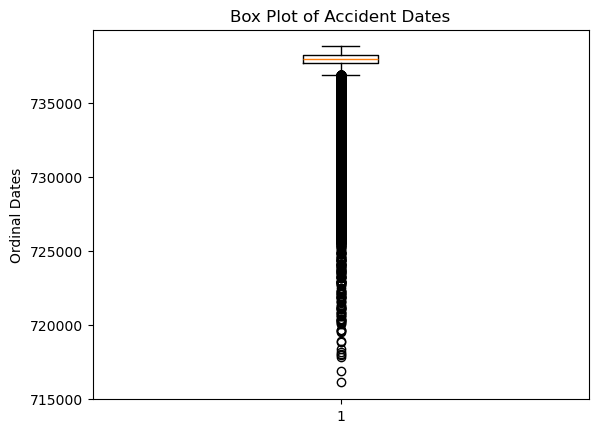

In [113]:
#Converting to ordinal for plotting
df['Accident Date Ordinal'] = df['Accident Date'].map(pd.Timestamp.toordinal)

plt.boxplot(df['Accident Date Ordinal'])
plt.title('Box Plot of Accident Dates')
plt.ylabel('Ordinal Dates')
plt.show()

In [114]:
df = df.drop(columns=['Accident Date Ordinal'])

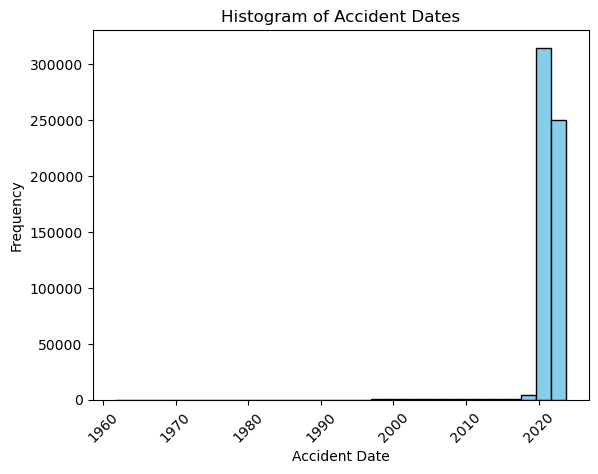

In [115]:
plt.hist(df['Accident Date'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Accident Dates')
plt.xlabel('Accident Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [116]:
#Converting to ordinal for calculation
ordinal_dates = df['Accident Date'].map(pd.Timestamp.toordinal)

Q1 = ordinal_dates.quantile(0.25)
Q3 = ordinal_dates.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(ordinal_dates < lower_bound) | (ordinal_dates > upper_bound)]

num_outliers = len(outliers)
total_records = len(df)
percentage_outliers = (num_outliers / total_records) * 100

print("Number of outliers in Accident Date:", num_outliers)
print("Percentage of outliers in Accident Date: {:.2f}%".format(percentage_outliers))

Number of outliers in Accident Date: 5647
Percentage of outliers in Accident Date: 0.98%


Since the training set only has claims data assembled from the beginning of 2020 to the end of 2022, any accident dates recorded before 2015 or after 2022 will most likely be wrong or irrelevant. Out of this defined time scope of the data, these could make the data noisy and not quite right for analysis. Hence, we filter out these kind of out of range values to maintain data integrity inside our training data and make a more performance-enhanced machine learning model.

This approach is preferable to simply removing outliers identified by the IQR method because outliers may not necessarily indicate data entry errors; they can represent valid but extreme cases. 

In [117]:
df['Accident Date'] = pd.to_datetime(df['Accident Date'], errors='coerce')

total_accident_dates = df.shape[0]

out_of_range_dates = df[(df['Accident Date'] < '2015-01-01') | (df['Accident Date'] > '2022-12-31')]

num_out_of_range_dates = len(out_of_range_dates)

percentage_out_of_range = (num_out_of_range_dates / total_accident_dates) * 100 if total_accident_dates > 0 else 0

print("Number of accident dates below 2015 or after 2022:", num_out_of_range_dates)
print("Percentage of outliers in Accident Date: {:.2f}%".format(percentage_out_of_range))

Number of accident dates below 2015 or after 2022: 4299
Percentage of outliers in Accident Date: 0.75%


In [118]:
df = df[(df['Accident Date'] >= '2015-01-01') & (df['Accident Date'] <= '2022-12-31')]

### Age at Injury

In [119]:
age_outliers_count = df[(df['Age at Injury'] < 16) | (df['Age at Injury'] > 90)].shape[0]

total_count = df.shape[0]

age_outliers_percentage = (age_outliers_count / total_count) * 100

print(f"Count of ages below 16 or above 90: {age_outliers_count}")
print(f"Percentage of ages below 16 or above 90: {age_outliers_percentage:.2f}%")

Count of ages below 16 or above 90: 5629
Percentage of ages below 16 or above 90: 0.99%


We have observed '0' values and ages below 18, as well as above 90, in the 'Age at Injury' column. These values are likely outliers. We will use a decision tree model to replace ages below 16 and above 90 for a more accurate representation of the data. However, this will be done after addressing any outliers or problems in data types in the other variables and after encoding the categorical variables.

### Assembly Date

In [120]:
df['Assembly Date'] = pd.to_datetime(df['Assembly Date'], errors='coerce')

total_assembly_dates = df.shape[0]

out_of_range_assembly_dates = df[(df['Assembly Date'] < '2020-01-01') | (df['Assembly Date'] > '2022-12-31')]

num_out_of_range_assembly_dates = len(out_of_range_assembly_dates)

percentage_out_of_range_assembly = (num_out_of_range_assembly_dates / total_assembly_dates) * 100 if total_assembly_dates > 0 else 0

print("Number of assembly dates below 2020 or after 2022:", num_out_of_range_assembly_dates)
print("Percentage of out-of-range assembly dates: {:.2f}%".format(percentage_out_of_range_assembly))

Number of assembly dates below 2020 or after 2022: 0
Percentage of out-of-range assembly dates: 0.00%


Since the training set only has claims data assembled from the beginning of 2020 to the end of 2022, any accident dates recorded before 2020 or after 2022 would be wrong. That is not case.

### Average Weekly Wage

In [121]:
Q1 = df['Average Weekly Wage'].quantile(0.25)
Q3 = df['Average Weekly Wage'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Average Weekly Wage'] < lower_bound) | (df['Average Weekly Wage'] > upper_bound)]

num_outliers = len(outliers)
total_records = len(df)
percentage_outliers = (num_outliers / total_records) * 100

print("Number of outliers in Average Weekly Wage:", num_outliers)
print("Percentage of outliers in Average Weekly Wage: {:.2f}%".format(percentage_outliers))

Number of outliers in Average Weekly Wage: 9862
Percentage of outliers in Average Weekly Wage: 1.73%


In [122]:
lower_bound = df['Average Weekly Wage'].quantile(0.002)
upper_bound = df['Average Weekly Wage'].quantile(0.998)

outliers = df[(df['Average Weekly Wage'] < lower_bound) | (df['Average Weekly Wage'] > upper_bound)]

num_outliers = len(outliers)
total_records = len(df)
percentage_outliers = (num_outliers / total_records) * 100

print("Number of outliers in Average Weekly Wage:", num_outliers)
print("Percentage of outliers in Average Weekly Wage: {:.2f}%".format(percentage_outliers))

Number of outliers in Average Weekly Wage: 2278
Percentage of outliers in Average Weekly Wage: 0.40%


Again, the IQR method was identifying 1,73% of the rows as outliers. On the contrary, the 0.2th and 99.8th percentiles reduce the flagged outliers to 0.40% of the data, thereby isolating only the most extreme values. This will allow us to focus on genuinely anomalous data points and avoid the unwarranted elimination of a larger section of the dataset.

In [123]:
df = df[(df['Average Weekly Wage'] >= lower_bound) & (df['Average Weekly Wage'] <= upper_bound)]

### C-2 Date

Since the training set only has claims data assembled from the beginning of 2020 to the end of 2022, any accident dates recorded before 2018 or after 2023 will most likely be wrong or irrelevant. Out of this defined time scope of the data, these could make the data noisy and not quite right for analysis. Hence, we filter out these kind of out of range values to maintain data integrity inside our training data and make a more performance-enhanced machine learning model.

This approach is preferable to simply removing outliers identified by the IQR method because outliers may not necessarily indicate data entry errors; they can represent valid but extreme cases.

Another important check is to identify any cases where the accident date occurs after the assembly or C-2 date. Such cases represent errors in the data, and we should remove these rows.

In [124]:
invalid_dates = df[(df['Accident Date'] > df['Assembly Date'])]

num_invalid_dates = len(invalid_dates)
percentage_invalid_dates = (num_invalid_dates / len(df)) * 100 if len(df) > 0 else 0

print("Number of rows where Accident Date is after Assembly Date:", num_invalid_dates)
print("Percentage of rows with invalid date order: {:.2f}%".format(percentage_invalid_dates))

Number of rows where Accident Date is after Assembly Date: 1333
Percentage of rows with invalid date order: 0.24%


In [125]:
df = df[~((df['Accident Date'] > df['Assembly Date']))]

#Verify the changes
num_invalid_dates_after = len(df[(df['Accident Date'] > df['Assembly Date'])])
print("Number of rows with invalid date order after removal:", num_invalid_dates_after)

Number of rows with invalid date order after removal: 0


### IME-4 Count

In [126]:
Q1 = df['IME-4 Count'].quantile(0.25)
Q3 = df['IME-4 Count'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['IME-4 Count'] < lower_bound) | (df['IME-4 Count'] > upper_bound)]

num_outliers = len(outliers)
total_records = len(df)
percentage_outliers = (num_outliers / total_records) * 100

print("Number of outliers in IME-4 Count:", num_outliers)
print("Percentage of outliers in IME-4 Count: {:.2f}%".format(percentage_outliers))

Number of outliers in IME-4 Count: 130870
Percentage of outliers in IME-4 Count: 23.13%


In [127]:
lower_bound = df['IME-4 Count'].quantile(0.002)
upper_bound = df['IME-4 Count'].quantile(0.998)

outliers = df[(df['IME-4 Count'] < lower_bound) | (df['IME-4 Count'] > upper_bound)]

num_outliers = len(outliers)
total_records = len(df)
percentage_outliers = (num_outliers / total_records) * 100

print("Number of outliers in IME-4 Count:", num_outliers)
print("Percentage of outliers in IME-4 Count: {:.2f}%".format(percentage_outliers))

Number of outliers in IME-4 Count: 1071
Percentage of outliers in IME-4 Count: 0.19%


Since the IQR method was identifying outliers at a percentage of 23%, a big percentage of values were being flagged as outliers, yet it may include values not extreme enough for exclusion. On the contrary, the 0.2th and 99.8th percentiles reduce the flagged outliers to 0.19% of the data, thereby isolating only the most extreme values. This will allow us to focus on genuinely anomalous data points and avoid the unwarranted elimination of a larger section of the dataset.

In [128]:
df = df[(df['IME-4 Count'] >= lower_bound) & (df['IME-4 Count'] <= upper_bound)]

## Handling Data Types

Claim Identifier likely represents a unique identifier for each claim. By setting it as the index, we can easily reference rows, which is useful for data mining and integrity.

In [129]:
df.set_index('Claim Identifier', inplace=True)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564783 entries, 5393875 to 6165075
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Accident Date                   564783 non-null  datetime64[ns]
 1   Age at Injury                   564783 non-null  float64       
 2   Alternative Dispute Resolution  564783 non-null  object        
 3   Assembly Date                   564783 non-null  datetime64[ns]
 4   Attorney/Representative         564783 non-null  object        
 5   Average Weekly Wage             564783 non-null  float64       
 6   Carrier Name                    564783 non-null  object        
 7   Carrier Type                    564783 non-null  object        
 8   Claim Injury Type               564783 non-null  object        
 9   County of Injury                564783 non-null  object        
 10  COVID-19 Indicator              564783 non-null  objec

Next, we will convert the float variables that should be represented as integers into integer data types.

In [131]:
columns_to_convert_to_int = [
    'Age at Injury',
    'IME-4 Count',
    'Industry Code',
    'WCIO Cause of Injury Code',
    'WCIO Nature of Injury Code',
    'WCIO Part Of Body Code',
    'Agreement Reached',
    'Number of Dependents',
]

df[columns_to_convert_to_int] = df[columns_to_convert_to_int].astype('Int64')

Most machine learning models, especially classical ones, such as logistic regression and decision trees, do not handle datetime variables directly, since most of them expect either numerical or categorical data. Hence, their transformation to numerical format was done by converting them into a ymd (year-month-day) format. That transformation will help the model to make sense of these variables as numbers while keeping the information relative to the date, but in a way that machine learning algorithms can make use of.

In [132]:
#Extracting year and month from 'Accident Date' column
df['Accident_year'] = df['Accident Date'].dt.year
df['Accident_month'] = df['Accident Date'].dt.month
df['Accident_day'] = df['Accident Date'].dt.day

#Extracting year and month from 'Assembly Date' column
df['Assembly_year'] = df['Assembly Date'].dt.year
df['Assembly_month'] = df['Assembly Date'].dt.month
df['Assembly_day'] = df['Assembly Date'].dt.day

In [133]:
#Combining year, month, and day into a single numerical variable for each date column
df['Accident_ymd'] = df['Accident_year'] * 10000 + df['Accident_month'] * 100 + df['Accident_day']
df['Assembly_ymd'] = df['Assembly_year'] * 10000 + df['Assembly_month'] * 100 + df['Assembly_day']

In [134]:
df = df.drop(columns=['Accident Date', 'Assembly Date',
    'Accident_year', 'Accident_month', 'Accident_day', 
    'Assembly_year', 'Assembly_month', 'Assembly_day', 
])

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564783 entries, 5393875 to 6165075
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Age at Injury                   564783 non-null  Int64  
 1   Alternative Dispute Resolution  564783 non-null  object 
 2   Attorney/Representative         564783 non-null  object 
 3   Average Weekly Wage             564783 non-null  float64
 4   Carrier Name                    564783 non-null  object 
 5   Carrier Type                    564783 non-null  object 
 6   Claim Injury Type               564783 non-null  object 
 7   County of Injury                564783 non-null  object 
 8   COVID-19 Indicator              564783 non-null  object 
 9   District Name                   564783 non-null  object 
 10  First Hearing Date              564783 non-null  int64  
 11  Gender                          564783 non-null  object 
 12  IME-4 Count   

In [136]:
df.head()

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,...,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Agreement Reached,Number of Dependents,C2-Date happened,C3-Date happened,Accident_ymd,Assembly_ymd
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393875,31,N,N,828.941243,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,...,27,10,62,13662,0,1,1,0,20191230,20200101
5393091,46,N,Y,1745.930000,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,...,97,49,38,14569,1,4,1,1,20190830,20200101
5393889,40,N,N,1434.800000,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,...,79,7,10,12589,0,6,1,0,20191206,20200101
5393887,61,N,N,1264.705725,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,DUTCHESS,N,ALBANY,...,16,43,36,12603,0,1,1,0,20191230,20200101
5393863,67,N,N,828.941243,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,3. MED ONLY,SUFFOLK,N,HAUPPAUGE,...,31,10,38,11772,0,5,1,0,20191226,20200101


## Treating 'Age at Injury' strange values

Remember:

*There are no missing values, but we have observed '0' values and ages below 18, as well as above 90, in the 'Age at Injury' column. These values are likely outliers. We will use a decision tree model to replace ages below 16 and above 90 for a more accurate representation of the data. However, this will be done after addressing any missing or unusual values in the other variables and after encoding the categorical variables.*

In [137]:
outliers_mask = (df['Age at Injury'] < 16) | (df['Age at Injury'] > 90)
outliers = df[outliers_mask]

valid_data = df[~outliers_mask]

df_copy = df.copy()

categorical_cols = df_copy.select_dtypes(include=['object']).columns.tolist()
encoder = LabelEncoder()

for col in categorical_cols:
    df_copy[col] = encoder.fit_transform(df_copy[col].astype(str))

features = df_copy.drop('Age at Injury', axis=1)

target = valid_data['Age at Injury']

model = DecisionTreeRegressor()
model_for_ages = model.fit(features.loc[valid_data.index], target)

outlier_features = df_copy.loc[outliers.index, features.columns]

if not outlier_features.empty:
    predicted_ages = model.predict(outlier_features)
    predicted_ages_rounded = predicted_ages.round().astype(int)
    df.loc[outliers_mask, 'Age at Injury'] = predicted_ages_rounded
else:
    print("No valid outlier features for prediction.")

In [138]:
age_outliers_count = df[(df['Age at Injury'] < 16) | (df['Age at Injury'] > 90)].shape[0]

total_count = df.shape[0]

age_outliers_percentage = (age_outliers_count / total_count) * 100

print(f"Count of ages below 16 or above 90: {age_outliers_count}")
print(f"Percentage of ages below 16 or above 90: {age_outliers_percentage:.2f}%")

Count of ages below 16 or above 90: 0
Percentage of ages below 16 or above 90: 0.00%


In [139]:
df['Age at Injury'].describe()

count     564783.0
mean     42.514408
std      13.683951
min           16.0
25%           31.0
50%           42.0
75%           54.0
max           90.0
Name: Age at Injury, dtype: Float64

Now, we no longer have any values for 'Age at Injury' below 16 or above 90, as those ages are considered non-workable.

**Have we removed too many rows?**

In [140]:
original_row_count = 593471
cleaned_row_count = df.shape[0]  

rows_removed = original_row_count - cleaned_row_count
percentage_removed = (rows_removed / original_row_count) * 100

print(f"Percentage of rows removed during preprocessing: {percentage_removed:.2f}%")

Percentage of rows removed during preprocessing: 4.83%


Within preprocessing, we were able to clean up 4.88% of the rows, which is quite good. We usually want to keep the number of removed observations under 5% because removing too many data points results in biased models and worse performance. Hence, keeping this percentage means a good outcome of our analysis.

In [141]:
df.isna().mean()

Age at Injury                     0.0
Alternative Dispute Resolution    0.0
Attorney/Representative           0.0
Average Weekly Wage               0.0
Carrier Name                      0.0
Carrier Type                      0.0
Claim Injury Type                 0.0
County of Injury                  0.0
COVID-19 Indicator                0.0
District Name                     0.0
First Hearing Date                0.0
Gender                            0.0
IME-4 Count                       0.0
Industry Code                     0.0
Medical Fee Region                0.0
WCIO Cause of Injury Code         0.0
WCIO Nature of Injury Code        0.0
WCIO Part Of Body Code            0.0
Zip Code                          0.0
Agreement Reached                 0.0
Number of Dependents              0.0
C2-Date happened                  0.0
C3-Date happened                  0.0
Accident_ymd                      0.0
Assembly_ymd                      0.0
dtype: float64

In [142]:
df_train_copy = df.copy()

## New Features

We created two features that show the number of days between main events: days_to_assembly and days_to_C2. These measure the time difference between an event like the date of the accident to any other important milestones, such as assembly or even when a certain form would have been completed.

Additionally, we introduced a new feature called AgeBracket. This feature categorizes individuals into different age groups based on the 'Age at Injury' column. 

In [143]:
def create_age_brackets(df, column_name='Age at Injury'):
    bins = [16, 25, 35, 45, 55, 65, 90]  
    labels = ['16-24', '25-34', '35-44', '45-54', '55-64', '65+']
    
    df['AgeBracket'] = pd.cut(df[column_name], bins=bins, labels=labels, right=False)
    return df

df = create_age_brackets(df)

In [144]:
df['days_to_assembly'] = df['Assembly_ymd'] - df['Accident_ymd']

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564783 entries, 5393875 to 6165075
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   Age at Injury                   564783 non-null  Int64   
 1   Alternative Dispute Resolution  564783 non-null  object  
 2   Attorney/Representative         564783 non-null  object  
 3   Average Weekly Wage             564783 non-null  float64 
 4   Carrier Name                    564783 non-null  object  
 5   Carrier Type                    564783 non-null  object  
 6   Claim Injury Type               564783 non-null  object  
 7   County of Injury                564783 non-null  object  
 8   COVID-19 Indicator              564783 non-null  object  
 9   District Name                   564783 non-null  object  
 10  First Hearing Date              564783 non-null  int64   
 11  Gender                          564783 non-null  object  
 12  

In [146]:
df_before_scalenc = df.copy()

## Before scalling...

C:\Users\tomas\AppData\Local\Temp\ipykernel_31376\1914718727.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=claim_injury_distribution.index, y=claim_injury_distribution.values, palette='viridis')


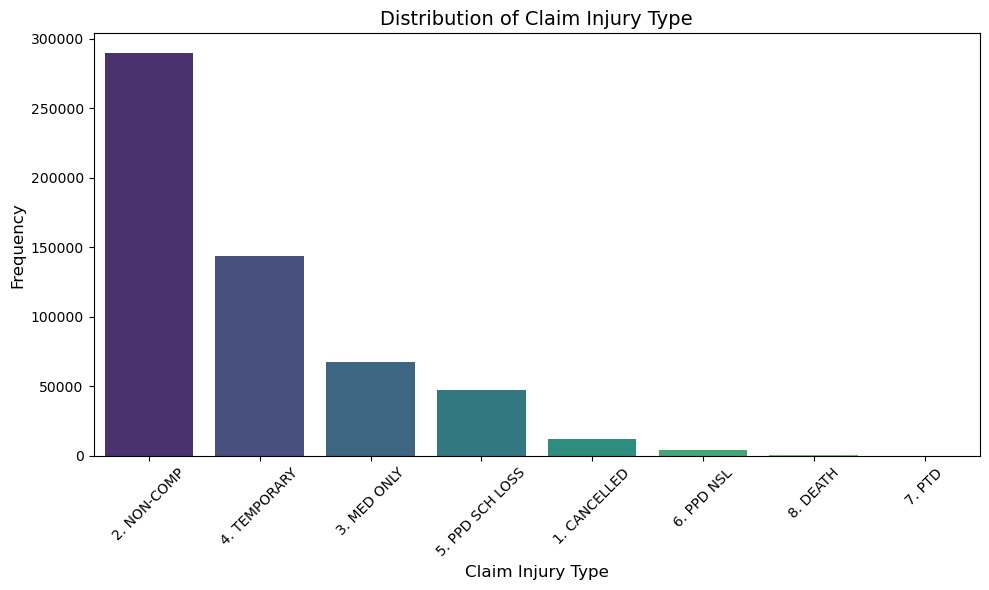

In [147]:
claim_injury_distribution = df['Claim Injury Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=claim_injury_distribution.index, y=claim_injury_distribution.values, palette='viridis')
plt.title('Distribution of Claim Injury Type', fontsize=14)
plt.xlabel('Claim Injury Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar chart reveals a significant imbalance in the target variable, 'Claim Injury Type'. The class labeled "2. NON-COMP" dominates the dataset, followed by "4. TEMPORARY" and "3. MED ONLY." Other categories have far fewer instances. This imbalance can be a challenge when training a model, as it may lead to biased predictions favoring the majority class. We will have to take this issue into account while building our model

In [148]:
#Split into features and target
target = 'Claim Injury Type'
X = df.drop(columns=[target])
y = df[target]

We separated the target variable from the rest of the features in the dataset. 

In [149]:
#Encode the target variable directly
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) 

#Define categorical columns to target encode
categorical_columns = [
    'Alternative Dispute Resolution',
    'Attorney/Representative',
    'Carrier Name',
    'Carrier Type',
    'County of Injury',
    'COVID-19 Indicator',
    'District Name',
    'Gender',
    'Medical Fee Region',
    'Zip Code',
    'AgeBracket'
]

#Initialize target encoder and apply it to the entire dataset (X)
target_encoder = ce.TargetEncoder(cols=categorical_columns)
X[categorical_columns] = target_encoder.fit_transform(X[categorical_columns], y)

Since most of the machine learning models require the target variable to be numeric, we applied label encoding to the target variable. Label encoding converts categorical labels into numerical values so that the model can understand and process them. Each unique category in the target variable was mapped with an integer value for model training.

Target encoding was done for variables of object type. In this technique, each category of a categorical feature is replaced with the mean of the target variable within that particular category. Target encoding allows the model to learn the relationships between the categorical feature and the target well, hence improving the performance of models, especially with high cardinality categorical variables.

In [150]:
#Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y, 
    shuffle=True)

In [151]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 451826 entries, 6108067 to 5615615
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Age at Injury                   451826 non-null  Int64  
 1   Alternative Dispute Resolution  451826 non-null  float64
 2   Attorney/Representative         451826 non-null  float64
 3   Average Weekly Wage             451826 non-null  float64
 4   Carrier Name                    451826 non-null  float64
 5   Carrier Type                    451826 non-null  float64
 6   County of Injury                451826 non-null  float64
 7   COVID-19 Indicator              451826 non-null  float64
 8   District Name                   451826 non-null  float64
 9   First Hearing Date              451826 non-null  int64  
 10  Gender                          451826 non-null  float64
 11  IME-4 Count                     451826 non-null  Int64  
 12  Industry Code 

## Data Scalling

Now that all the variables are in numeric format, we go ahead and scale the data. Scaling is a must to ensure features contribute equally to the model performance when features are in different units or magnitudes.
Because the scaler is fitted on the train data alone, the model never gets a prior knowledge about the test set- therefore keeping the wholesomeness of the evaluation process. Once fitted, the same scaling parameters will be applied to the training and testing datasets.


In [152]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)

In [153]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_val= pd.DataFrame(X_val, columns=X.columns)

In [154]:
X_train.head()

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,...,WCIO Part Of Body Code,Zip Code,Agreement Reached,Number of Dependents,C2-Date happened,C3-Date happened,Accident_ymd,Assembly_ymd,AgeBracket,days_to_assembly
0,0.486486,1.0,1.0,0.516573,0.856848,0.898851,0.932793,1.0,0.229493,1.0,...,0.000000,0.443384,0.0,0.666667,1.0,1.0,0.995768,0.989683,1.000000,0.001186
1,0.689189,1.0,1.0,0.091106,0.631927,0.725037,0.340611,1.0,0.155693,1.0,...,0.601852,0.449515,0.0,1.000000,1.0,0.0,0.987361,0.961287,0.947388,0.001158
2,0.216216,1.0,0.0,0.153622,0.493338,0.725037,0.035269,1.0,0.229493,0.0,...,0.472222,0.203225,0.0,0.333333,1.0,0.0,0.852128,0.502224,0.547327,0.000014
3,0.108108,1.0,0.0,0.153622,0.525295,0.725037,0.792261,1.0,0.229493,0.0,...,0.361111,0.432952,0.0,0.500000,1.0,0.0,0.704677,0.009607,0.000000,0.001130
4,0.067568,1.0,0.0,0.153884,0.405775,0.697653,0.922794,1.0,0.155693,0.0,...,0.435185,0.500976,0.0,0.500000,1.0,0.0,0.718680,0.053053,0.000000,0.000028


In [155]:
categorical_columns = [
    'Carrier Name',
    'Carrier Type',
    'County of Injury',
    'District Name',
    'Gender',
    'Medical Fee Region',
    'Zip Code',
    'WCIO Cause of Injury Code',
    'WCIO Nature of Injury Code',
    'WCIO Part Of Body Code',
    'Industry Code',
    'AgeBracket',
]

#Creating subsets for training and validation
X_train_num = X_train.drop(columns=categorical_columns)
X_train_cat = X_train[categorical_columns]

X_val_num = X_val.drop(columns=categorical_columns)
X_val_cat = X_val[categorical_columns]


print("Numeric features in training set:", X_train_num.shape[1])
print("Categorical features in training set:", X_train_cat.shape[1])

print("Numeric features in validation set:", X_val_num.shape[1])
print("Categorical features in validation set:", X_val_cat.shape[1])

Numeric features in training set: 14
Categorical features in training set: 12
Numeric features in validation set: 14
Categorical features in validation set: 12


We created a list of all the categorical variables of the dataset. Binary variables are also included as categorical because, although they possess two values-0 and 1-the meaning is categorically rather than in numeric order. 

We divided the data into subsets for categorical and numeric to facilitate our feature selection analysis. 

In [156]:
X_train_num.head()

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,COVID-19 Indicator,First Hearing Date,IME-4 Count,Agreement Reached,Number of Dependents,C2-Date happened,C3-Date happened,Accident_ymd,Assembly_ymd,days_to_assembly
0,0.486486,1.0,1.0,0.516573,1.0,1.0,0.071429,0.0,0.666667,1.0,1.0,0.995768,0.989683,0.001186
1,0.689189,1.0,1.0,0.091106,1.0,1.0,0.142857,0.0,1.000000,1.0,0.0,0.987361,0.961287,0.001158
2,0.216216,1.0,0.0,0.153622,1.0,0.0,0.000000,0.0,0.333333,1.0,0.0,0.852128,0.502224,0.000014
3,0.108108,1.0,0.0,0.153622,1.0,0.0,0.000000,0.0,0.500000,1.0,0.0,0.704677,0.009607,0.001130
4,0.067568,1.0,0.0,0.153884,1.0,0.0,0.000000,0.0,0.500000,1.0,0.0,0.718680,0.053053,0.000028


In [158]:
X_train_cat.head()

,Carrier Name,Carrier Type,County of Injury,District Name,Gender,Medical Fee Region,Zip Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Industry Code,AgeBracket
0,0.856848,0.898851,0.932793,0.229493,0.844181,1.000000,0.443384,0.551020,0.533333,0.000000,1.000000,1.000000
1,0.631927,0.725037,0.340611,0.155693,0.521184,0.235166,0.449515,0.755102,0.100000,0.601852,0.629630,0.945824
2,0.493338,0.725037,0.035269,0.229493,0.521184,1.000000,0.203225,0.122449,0.566667,0.472222,0.753086,0.546504
3,0.525295,0.725037,0.792261,0.229493,0.844181,1.000000,0.432952,1.000000,0.644444,0.361111,0.753086,0.000000
4,0.405775,0.697653,0.922794,0.155693,0.844181,0.235166,0.500976,0.755102,0.100000,0.435185,0.419753,0.000000


# Feature Selection

In this part, we aim to select features that contribute the most in relevance while predicting claims outcomes effectively. This refines the model by concentrating on the most relevant features for prediction, hence reducing the processing time taken and minimizing noise that may be bad for model performance. This is a very important step, since it will enable our model to learn the essential patterns of the data without losing computational efficiency, given the voluminous claims that WCB has to deal with.

## Spearman Correlations

The Spearman correlation is a non-parametric measure showing the strength and direction of association between two variables. Spearman correlation is applied only on numeric variables, since it measures a monotonic relationship among variables where monotonic means the relationship of two variables can be explained by a monotonic function, which is either purely increasing or purely decreasing.

In this study, we captured both linear and monotonic relationships between the numeric variables using Spearman correlation in order to further comprehend the relationships and dependencies within the dataset.


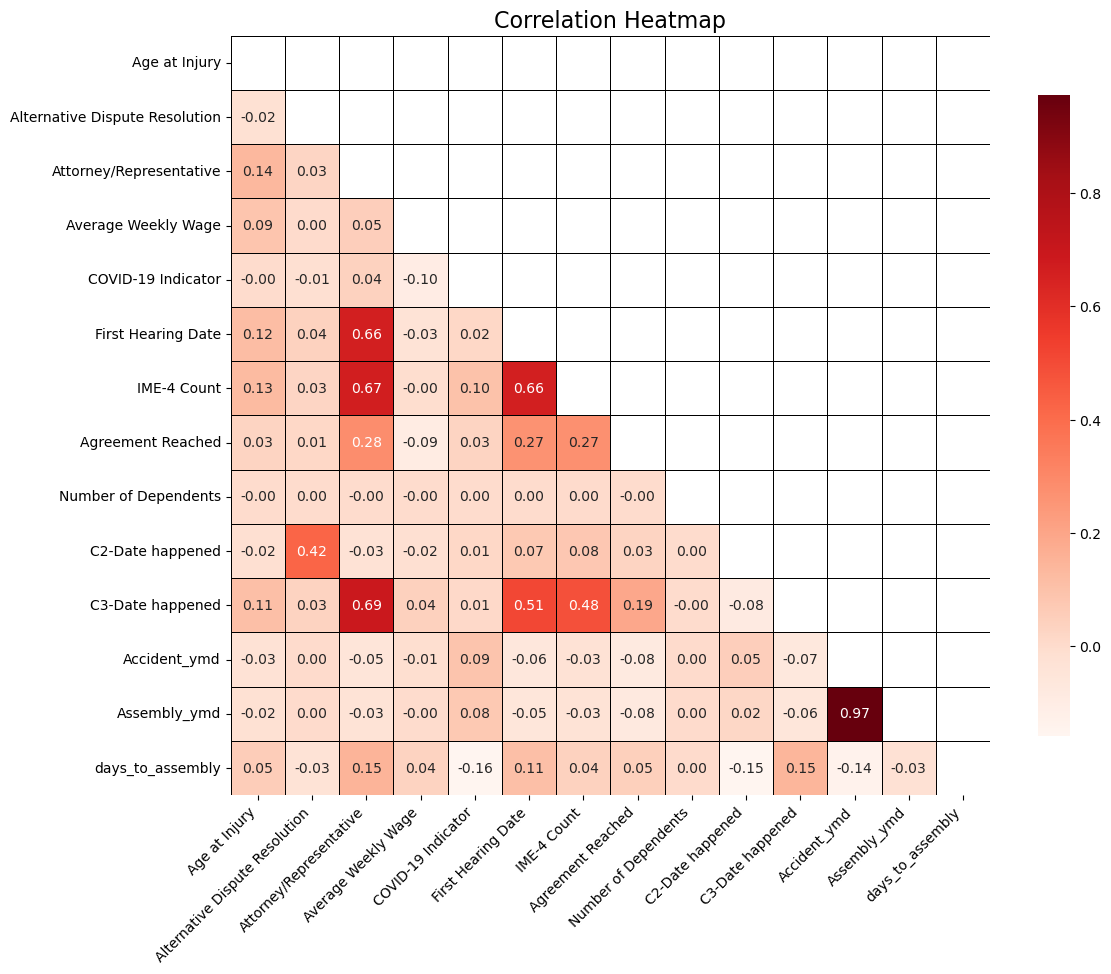

In [159]:
def cor_heatmap(cor, title='Correlation Heatmap', cmap='Reds'):
    mask = np.triu(np.ones_like(cor, dtype=bool))

    plt.figure(figsize=(12, 10))
    sns.heatmap(data=cor, annot=True, cmap=cmap, fmt='.2f', 
                 mask=mask, linewidths=0.5, linecolor='black', square=True,
                 cbar_kws={"shrink": .8})
    
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

cor_spearman = X_train_num.corr(method='spearman')
cor_heatmap(cor_spearman)

- Accident_ymd, Assembly_ymd, and C-2_ymd are highly correlated. We will have to remove 1 or 2 of them.
- days_to_C2 and days_to_assembly are also highly correlated. We will have to choose one.

## Chi Squared

In [160]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

for var in X_train_cat:
    TestIndependence(X_train_cat[var],y_train, var)

Carrier Name is IMPORTANT for Prediction
Carrier Type is IMPORTANT for Prediction
County of Injury is IMPORTANT for Prediction
District Name is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction
Medical Fee Region is IMPORTANT for Prediction
Zip Code is IMPORTANT for Prediction
WCIO Cause of Injury Code is IMPORTANT for Prediction
WCIO Nature of Injury Code is IMPORTANT for Prediction
WCIO Part Of Body Code is IMPORTANT for Prediction
Industry Code is IMPORTANT for Prediction
AgeBracket is IMPORTANT for Prediction


In [161]:
def TestIndependence(X, y, var, alpha=0.05):        
    dfObserved = pd.crosstab(y, X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)

    if (expected < 5).any():
        print(f"WARNING: Some expected frequencies are less than 5 for variable {var}. Results may not be valid.")
    
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index=dfObserved.index)
    
    if p < alpha:
        result = "{0} is IMPORTANT for Prediction".format(var)
    else:
        result = "{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    
    print(result)

for var in X_train_cat.columns:
    TestIndependence(X_train_cat[var], y_train, var)

Carrier Name is IMPORTANT for Prediction
Carrier Type is IMPORTANT for Prediction
County of Injury is IMPORTANT for Prediction
District Name is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction
Medical Fee Region is IMPORTANT for Prediction
Zip Code is IMPORTANT for Prediction
WCIO Cause of Injury Code is IMPORTANT for Prediction
WCIO Nature of Injury Code is IMPORTANT for Prediction
WCIO Part Of Body Code is IMPORTANT for Prediction
Industry Code is IMPORTANT for Prediction
AgeBracket is IMPORTANT for Prediction


The Chi-square test may not be appropriate for our data, since in several categorical variables, low expected frequencies occur. Whenever the expected frequencies are less than 5, the test result is not valid, and this may lead to inappropriate conclusions regarding the independence between predictors and the target variable. 

Also, the test will only determine whether there is or is not a relationship. It gives nothing about the strength of a relationship and its practical importance. 

Thus, being restrictive to our predictive modeling, other statistical methods might be more appropriate for assessing the relevance of our categorical variables.

## RandomForestClassifier

RandomForestClassifier is a versatile classifier that works with numeric and categorical features. The general idea of how it works is to create multiple trees; based on their combined decisions, it decides on a target observation. One of the major advantages of Random Forest includes handling numeric and encoded categorical features quite easily.

We chose this method because it is robust and works well with big datasets. Besides that, the RandomForestClassifier is very interpretable regarding which features contribute most to the model's prediction, which is important for the insights about the dataset and further decisions.

In [162]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

The most important features identified by the RandomForestClassifier are Average Weekly Wage, IME-4 Count, Attorney/Representative, First Hearing Date, Carrier Name and Zip Code.

On the other hand, the least important featuresaree Alternative Dispute Resolution, COVID-19 Indicator, Gender, Medical Fee Region,AgeBracket,  Carrier Type, and District Name
tion.

## LightGBM

Like RandomForest, LightGBM can handle categorical data directly. It will internally optimize the variables more effectively, though. Because the categorical variables here have already been target-encoded into continuous numeric features, LightGBM will see them as numeric inputs.

In [ ]:
d_train = lgb.Dataset(X_train, label=y_train)

params = {
    'objective': 'multiclass',
    'num_class': len(pd.Series(y_train).unique()),  
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt'
}

clf = lgb.train(params, d_train, 100)

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': clf.feature_importance()
}).sort_values(by='Importance', ascending=False)

print(importance_df)

In [ ]:
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance from LightGBM Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

The most important features identified by LightGBM include Average Weekly Wage, WCIO Part Of Body Code, Carrier Name, Industry Code, WCIO Cause of Injury Code, and Zip Code.

In contrast, the least important features were Alternative Dispute Resolutione,Age Bracketd, Medical Fee Region Agreement Reached, and, Number of Dependent.


## Mutual Information

Mutual Information was used in this analysis to measure the dependency between variables and target.
This method quantifies the amount of information shared by two variables, indicating how much knowing one variable reduces uncertainty about the other. Mutual Information can handle both continuous numeric features and discrete categorical features, which are treated as numeric after encoding. Therefore, this makes it appropriate for finding relationships and dependencies in both kinds of features, which is a useful tool in feature selection when models have to deal with mixed data types.


In [ ]:
mi_scores = mutual_info_classif(X_train, y_train)

mi_df = pd.DataFrame({'Feature': X_train.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False).reset_index(drop=True)
print("Mutual Information Scores:\n", mi_df)

In [ ]:
top_features = mi_df['Feature'].head(10)
X_train_top = X_train[top_features]
X_val_top = X_val[top_features]  

print("Top features based on MI:\n", top_features)

The most important features, based on their Mutual Information values, include Average Weekly Wage, IME-4 Count, Attorney/Representative, and First Hearing Date.

On the other hand, the least important features, which showed minimal dependency with the target variable, includeNumber of Dependents, Assembly_ymd, County of Injury,  Age at Injur, and, Accident_ym.


## ANOVA F-statistic

In [ ]:
k = 10
selector = SelectKBest(score_func=f_classif, k=k)
selector.fit(X_train_num, y_train)

selected_features_mask = selector.get_support()
selected_features = X_train_num.columns[selected_features_mask]
print("Selected Features:", selected_features)

X_train_selected = X_train_num.loc[:, selected_features]
X_val_selected = X_val_num.loc[:, selected_features]

print("Shape of X_train_selected:", X_train_selected.shape)
print("Shape of X_val_selected:", X_val_selected.shape)

X_train_final = pd.concat([X_train_selected.reset_index(drop=True), X_train_cat.reset_index(drop=True)], axis=1)
X_val_final = pd.concat([X_val_selected.reset_index(drop=True), X_val_cat.reset_index(drop=True)], axis=1)

print("Shape of X_train_final:", X_train_final.shape)
print("Shape of X_val_final:", X_val_final.shape)

We applied the SelectKBest method using the ANOVA F-statistic to select the top 7 numerical features from our scaled training dataset, with the goal of seeing which are the 2 with weaker relationship with the target variable.

Results:
- Number of Dependents and C-2_ymd are the 2 features with weaker relationship with the target variable.

In [ ]:
k = 5
selector = SelectKBest(score_func=f_classif, k=k)
selector.fit(X_train_num, y_train)

selected_features_mask = selector.get_support()
selected_features = X_train_num.columns[selected_features_mask]
print("Selected Features:", selected_features)

X_train_selected = X_train_num.loc[:, selected_features]
X_val_selected = X_val_num.loc[:, selected_features]

print("Shape of X_train_selected:", X_train_selected.shape)
print("Shape of X_val_selected:", X_val_selected.shape)

X_train_final = pd.concat([X_train_selected.reset_index(drop=True), X_train_cat.reset_index(drop=True)], axis=1)
X_val_final = pd.concat([X_val_selected.reset_index(drop=True), X_val_cat.reset_index(drop=True)], axis=1)

print("Shape of X_train_final:", X_train_final.shape)
print("Shape of X_val_final:", X_val_final.shape)

We applied the SelectKBest method using the ANOVA F-statistic to select the top 4 numerical features with the strongest relationship with the target variable.

Results:
- Average Weekly Wage, IME-4 Count, days_to_C2, and days_to_assembly are the 4 numerical features with the strongest relationship with the target variable.

## Recursive Feature Elimination (RFE)

We used Recursive Feature Elimination (RFE) to identify the optimal number of numerical features for a Logistic Regression model.

In [ ]:
# Select only the first 50,000 rows
X_train_num_subset = X_train_num[:50000]
y_train_subset = y_train[:50000]

nof_list = np.arange(1, X_train_num_subset.shape[1] + 1)            
high_score = 0
nof = 0           
train_score_list = []
val_score_list = []

for n in range(len(nof_list)):
    model = RandomForestClassifier(n_estimators=100, random_state=15)
    
    rfe = RFE(estimator=model, n_features_to_select=nof_list[n])
    
    X_train_rfe = rfe.fit_transform(X_train_num_subset, y_train_subset)
    X_val_rfe = rfe.transform(X_val_num)
    
    model.fit(X_train_rfe, y_train_subset)
    
    train_score = model.score(X_train_rfe, y_train_subset)
    train_score_list.append(train_score)
    
    val_score = model.score(X_val_rfe, y_val)
    val_score_list.append(val_score)
    
    if val_score >= high_score:
        high_score = val_score
        nof = nof_list[n]

        features_to_select = pd.Series(rfe.support_, index = X_train_num.columns)

print("Optimum number of features: %d" % nof)
print("Score with %d features: %f" % (nof, high_score))
print(f"Features to select: \n{features_to_select}")

According to this method, only 'Average Weekly Wage' and 'IME-4 Count' are the only numerical variables that should be keeped.

## Lasso Regression

In [ ]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [ ]:
reg = LassoCV(alphas=np.logspace(-4, 0, 100), cv=5)

In [ ]:
reg.fit(X_train_num, y_train)

In [ ]:
coef = pd.Series(reg.coef_, index=X_train_num.columns)
coef

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [ ]:
plot_importance(coef,'Lasso')

LASSO is a regularization technique that helps in feature selection by penalizing large coefficients, pushing some of them to zero.

The LASSO results indicate that variables 'Number of Dependents', 'Accident_ymd' and 'days_to_C2' have been assigned coefficients of zero, suggesting they are not useful predictors in this context.

## Conclusions

### Date Collumns

In the case of date columns, we needed to compare them closely, as we observed a high correlation between them in the correlation matrix. To address this, we assigned a ranking to each variable based on its importance for each feature selection method.

For example, when using RandomForestClassifier, the variable Accident_ymd was the most important predictor, followed by Assembly_ymd, and C-2_ymd came last. The same approach was applied to the days_to_assembly and days_to_C2 variables. 

| Predictor | RandomForestClassifier | LightGBM | Mutual Information | ANOVA F-statistic | RFE LR | LASSO | What to do? (One possible way to "solve") |
| --- | --- | --- |--- |---| --- | --- | --- |
| Accident_ymd | 1 | 1 | 2 | 1 | 3 | 3 | Discard |
| Assembly_ymd | 2 | 2 | 3 | 1 | 3 | 2 | Discard |
| C-2_ymd | 3 | 3 | 1 | 3 | 3 | 1 | Include in the model |
| --- | --- | --- |--- |---| --- | --- | --- |
| days_to_assembly | 2 | 1 | 2 | 1 |  2 | 1 | Include in the model |
| days_to_C2 | 1 | 2 | 1 | 1 | 2 | 2 | Discard |

As a result, the variables C-2_ymd and days_to_assembly were retained, while the others were discarded.

### Remaining Collumns

| Predictor | Spearman  | RandomForestClassifier | LightGBM | Mutual Information | ANOVA F-statistic | RFE LR | LASSO | What to do? (One possible way to "solve") |
| --- | --- | --- | --- |--- |---| --- | --- | --- |
| Age at Injury | Keep | Keep | Keep | Discard? | Keep? | Discard | Keep | Include in the model |
| Alternative Dispute Resolution | NA | Discard | Discard | Keep? | NA | NA  | NA | Discard |
| Attorney/Representative | NA | Keep | Keep? | Keep | NA | NA | NA | Include in the model |
| Average Weekly Wage | Keep | Keep | Keep | Keep | Keep |  Keep | Keep | Include in the model |
| Carrier Name | NA | Keep | Keep | Keep | NA | NA | NA | Include in the model |
| Carrier Type | NA | Keep? | Keep? | Keep? | NA | NA | NA | Include in the model |
| County of Injury | NA | Keep? | Keep? | Discard? | NA | NA | NA | Try with and without |
| COVID-19 Indicator | NA | Discard | Discard? | Keep? | NA | NA | NA | Discard |
| District Name | NA | Keep? | Keep? | Keep? | NA | NA | NA | Try with and without |
| First Hearing Date | NA | Keep | Keep | Keep | NA | NA | NA | Include in the model |
| Gender | NA | Discard | Discard | Keep? | NA | NA | NA | Discard |
| IME-4 Count | Keep | Keep | Keep | Keep | Keep | Keep | Keep | Include in the model |
| Industry Code | NA | Keep | Keep | Keep | NA | NA | NA | Include in the model |
| Medical Fee Region | NA | Discard? | Discard? | Keep? | NA | NA | NA | Discard |
| WCIO Cause of Injury Code | NA | Keep | Keep | Keep | NA | NA | NA | Include in the model |
| WCIO Nature of Injury Code | NA | Keep? | Keep | Keep | NA | NA | NA | Include in the model |
| WCIO Part Of Body Code | NA | Keep | Keep | Keep | NA | NA | NA | Include in the model |
| Zip Code | NA | Keep | Keep | Keep | NA | NA | NA | Include in the model |
| Agreement Reached | NA | Keep? | Discard? | Keep | NA | NA | NA | Include in the model |
| Number of Dependents | Keep | Keep? | Keep? | Discard | Discard | Discard | Discard | Discard |

In [157]:
include_variables = [
                     'Age at Injury', 
                     'Attorney/Representative',
                     'Average Weekly Wage',
                     'Carrier Name',
                     'First Hearing Date',
                     'IME-4 Count',
                     'Industry Code',
                     'WCIO Cause of Injury Code',
                     'WCIO Nature of Injury Code',
                     'WCIO Part Of Body Code',
                     'Zip Code',
                     'Agreement Reached',
                     'C2-Date happened',
                     'C3-Date happened',
                     'days_to_assembly'   
                    ]
 
discard_variables = ['Alternative Dispute Resolution',
                     'Carrier Type',
                     'County of Injury',
                     'COVID-19 Indicator',
                     'Gender',
                     'Number of Dependents',
                     'District Name',
                     'Medical Fee Region',
                     'Accident_ymd', 
                     'Assembly_ymd',
                     'days_to_C2'
                     ]

# Model Assessment and Selection

Below, we apply the RKF method for performance comparison of three classifiers: Logistic Regression, RandomForestClassifier, and HistGradientBoostingClassifier.

Repeated K-Fold Cross-Validation can be very effective in estimating the performance and robustness of a given model. It works by splitting the data into K subsets-or "folds"-and it trains models on K - 1 folds while testing it on the remaining fold. This is repeated multiple times to give a wider range of the evaluation of model performance by reducing variability due to the random split of data.

## Logistic Regression

In [158]:
from sklearn.metrics import f1_score

In [159]:
X_cols = X.columns
X = scaler.transform(X)
X = pd.DataFrame(X, columns=X_cols)

In [ ]:
def run_model_LR(X, y):
    model = LogisticRegression(solver='saga', max_iter=5000)

    model.fit(X, y)

    return model

In [174]:
def evaluate_model(X,y, model):
    return model.score(X,y)

In [ ]:
def avg_score_LR(method,X,y):

    X = X[include_variables].iloc[:20000]
    y = y[:20000]
    
    score_train = []
    score_test = []
    f1_train = []
    f1_test = []
    
    for train_index, test_index in method.split(X,y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model = run_model_LR(X_train, y_train)
        
        value_train = evaluate_model(X_train, y_train, model)
        value_test = evaluate_model(X_test, y_test, model)
        
        score_train.append(value_train)
        score_test.append(value_test)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        f1_train.append(f1_score(y_train, y_train_pred, average='weighted'))
        f1_test.append(f1_score(y_test, y_test_pred, average='weighted'))

    print('Train Accuracy:', np.mean(score_train))
    print('Test Accuracy:', np.mean(score_test))
    print('Train F1 Score:', np.mean(f1_train))
    print('Test F1 Score:', np.mean(f1_test))

In [166]:
from sklearn.model_selection import StratifiedKFold

method = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
avg_score_LR(method, X, y)

Train Accuracy: 0.66
Test Accuracy: 0.6598499999999999
Train F1 Score: 0.5975565303899961
Test F1 Score: 0.5974974635515127


- ~52% on both train and test sets, which suggests some room for improvement.
- Logistic Regression might not be the best fit for the data, especially if the relationships between the variables are non-linear or complex.

## RandomForestClassifier

In [ ]:
def run_model_RF(X, y):
    model = RandomForestClassifier(n_estimators=50, max_depth=9, random_state=15)
    
    model.fit(X, y)
    
    return model

In [ ]:
def evaluate_model(X, y, model):
    return model.score(X, y)

In [ ]:
def avg_score_RF(method, X, y):

    X = X[include_variables].iloc[:20000]
    y = y[:20000]
    
    score_train = []
    score_test = []
    f1_train = []
    f1_test = []
    
    for train_index, test_index in method.split(X,y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model = run_model_RF(X_train, y_train)
        
        value_train = evaluate_model(X_train, y_train, model)
        value_test = evaluate_model(X_test, y_test, model)
        
        score_train.append(value_train)
        score_test.append(value_test)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        f1_train.append(f1_score(y_train, y_train_pred, average='weighted'))
        f1_test.append(f1_score(y_test, y_test_pred, average='weighted'))

    print('Train Accuracy:', np.mean(score_train))
    print('Test Accuracy:', np.mean(score_test))
    print('Train F1 Score:', np.mean(f1_train))
    print('Test F1 Score:', np.mean(f1_test))

In [ ]:
avg_score_RF(method, X, y)

Train Accuracy: 0.7686499999999999
Test Accuracy: 0.7346
Train F1 Score: 0.7199809673291483
Test F1 Score: 0.6800984386439962


### Including 1 try_variable

### Including the other try_variable

### Including both try_variables

### Conclusions

|  | Include Varibales | Include Variables + 'District Name' | Include Variables + 'County of Injury' | Include Variables + 'District Name' + 'County of Injury' | 
| --- | --- | --- |--- |---|
| Train Accuracy | 0.7637 | 0.7701 | 0.7706 | 0.7699 |
| Test Accuracy | 0.7307 | 0.7349 | 0.7349 | 0.7353 | 
| --- | --- | --- |--- |---| 
|Train F1 Score | 0.7108 | 0.7216 | 0.7220 | 0.7211 | 
| Test F1 Score | 0.6670 | 0.6774 | 0.6774 | 0.6778 | 

Regarding the try_variables, we observed minimal improvement with their inclusion.

We obtained better results with the RandomForestClassifier. However, trying to use the model on test data, we faced the problem that RandomForestClassifier does not handle missing values. Since our test dataset contains missing values, this led to errors during prediction.

Having this in mind, we decided to test the HistGradientBoostingClassifier that had better handling for missing data and was supposed to perform very well on large datasets. 

## HistGradientBoostingClassifier

In [160]:
def run_model_HGB(X, y):
    model = HistGradientBoostingClassifier(max_iter=500, max_depth=7, random_state=15)
    
    model.fit(X, y)

    return model

In [161]:
def evaluate_model(X, y, model):
    return model.score(X, y)

In [162]:
def avg_score_HGB(method, X, y, include_variables):
    X = X[include_variables].iloc[:20000]
    y = y[:20000]
    
    score_train = []
    score_test = []
    f1_train = []
    f1_test = []
    
    for train_index, test_index in method.split(X,y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model = run_model_HGB(X_train, y_train)
        
        value_train = evaluate_model(X_train, y_train, model)
        value_test = evaluate_model(X_test, y_test, model)
        
        score_train.append(value_train)
        score_test.append(value_test)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        f1_train.append(f1_score(y_train, y_train_pred, average='weighted'))
        f1_test.append(f1_score(y_test, y_test_pred, average='weighted'))

    print('Train Accuracy:', np.mean(score_train))
    print('Test Accuracy:', np.mean(score_test))
    print('Train F1 Score:', np.mean(f1_train))
    print('Test F1 Score:', np.mean(f1_test))

In [ ]:
avg_score_HGB(method, X, y, include_variables)

Train Accuracy: 0.7845625
Test Accuracy: 0.7447000000000001
Train F1 Score: 0.7524041687358581
Test F1 Score: 0.7053644420903302


## Neural Networks

In [259]:
from sklearn.neural_network import MLPClassifier

def run_model_NN(X, y):
    model = MLPClassifier(hidden_layer_sizes=150, max_iter=300)
    
    model.fit(X, y)

    return model


In [260]:
def avg_score_NN(method, X, y):

    X = X[include_variables].iloc[:20000]
    y = y[:20000]
    
    score_train = []
    score_test = []
    f1_train = []
    f1_test = []
    
    for train_index, test_index in method.split(X,y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model = run_model_NN(X_train, y_train)
        
        value_train = evaluate_model(X_train, y_train, model)
        value_test = evaluate_model(X_test, y_test, model)
        
        score_train.append(value_train)
        score_test.append(value_test)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        f1_train.append(f1_score(y_train, y_train_pred, average='weighted'))
        f1_test.append(f1_score(y_test, y_test_pred, average='weighted'))

    print('Train Accuracy:', np.mean(score_train))
    print('Test Accuracy:', np.mean(score_test))
    print('Train F1 Score:', np.mean(f1_train))
    print('Test F1 Score:', np.mean(f1_test))

In [257]:
avg_score_NN(method, X, y)

c:\Users\tomas\anaconda3\envs\DM2425\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\tomas\anaconda3\envs\DM2425\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\tomas\anaconda3\envs\DM2425\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Accuracy: 0.7353125
Test Accuracy: 0.72175
Train F1 Score: 0.6918618891142787
Test F1 Score: 0.6771876008910791


c:\Users\tomas\anaconda3\envs\DM2425\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


### Including 1 try_variable

### Including the other try_variable

### Including both try_variables

### Conclusions

|  | Include Varibales | Include Variables + 'District Name' | Include Variables + 'County of Injury' | Include Variables + 'District Name' + 'County of Injury' | 
| --- | --- | --- |--- |---|
| Train Accuracy | 0.7761 | 0.7767 | 0.7810 | 0.7815 |
| Test Accuracy | 0.7393 | 0.7436 | 0.7440 | 0.7410 | 
| --- | --- | --- |--- |---| 
|Train F1 Score | 0.7408 | 0.7389 | 0.7438 | 0.7481 | 
| Test F1 Score | 0.6977 | 0.7010 | 0.7006 | 0.7006 | 

Although the improvement was not that much, we decided to include the 'District Name' in the include_variables.

### With the full X

In [169]:
def run_model_HGB(X, y):
    model = HistGradientBoostingClassifier(class_weight='balanced', max_iter=500, max_depth=7, random_state=15)
    model.fit(X, y)

    return model

In [170]:
def avg_score_HGB(method, X, y, include_variables):
    X = X[include_variables]
    
    score_train = []
    score_test = []
    f1_train = []
    f1_test = []
    
    for train_index, test_index in method.split(X,y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model = run_model_HGB(X_train, y_train)
        
        value_train = evaluate_model(X_train, y_train, model)
        value_test = evaluate_model(X_test, y_test, model)
        
        score_train.append(value_train)
        score_test.append(value_test)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        f1_train.append(f1_score(y_train, y_train_pred, average='weighted'))
        f1_test.append(f1_score(y_test, y_test_pred, average='weighted'))

    print('Train Accuracy:', np.mean(score_train))
    print('Test Accuracy:', np.mean(score_test))
    print('Train F1 Score:', np.mean(f1_train))
    print('Test F1 Score:', np.mean(f1_test))

In [ ]:
avg_score_HGB(method, X, y, include_variables)

Train Accuracy: 0.628089906179431
Test Accuracy: 0.6254561403048257
Train F1 Score: 0.6538423865317544
Test F1 Score: 0.6517540362914754


# TRY MODELS HERE

StackC

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
def run_model_StackC(X, y):
    estimators = [
        ('rf', RandomForestClassifier(n_estimators=80, max_depth=8, min_samples_split=10, random_state=42, class_weight='balanced'))
    ]
    model = StackingClassifier(estimators=estimators, final_estimator=HistGradientBoostingClassifier(max_iter=400, max_depth=7,  l2_regularization=1.0, min_samples_leaf=10, random_state=15, class_weight='balanced'))
    model.fit(X, y)
    return model

In [ ]:
def evaluate_model(X, y, model):
    return model.score(X, y)

In [ ]:
def avg_score_StackC(method, X, y, include_variables):
    X = X[include_variables].iloc[:20000]
    y = y[:20000]
    
    score_train = []
    score_test = []
    f1_train = []
    f1_test = []
    
    for train_index, test_index in method.split(X,y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model = run_model_StackC(X_train, y_train)
        
        value_train = evaluate_model(X_train, y_train, model)
        value_test = evaluate_model(X_test, y_test, model)
        
        score_train.append(value_train)
        score_test.append(value_test)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        f1_train.append(f1_score(y_train, y_train_pred, average='weighted'))
        f1_test.append(f1_score(y_test, y_test_pred, average='weighted'))

    print('Train Accuracy:', np.mean(score_train))
    print('Test Accuracy:', np.mean(score_test))
    print('Train F1 Score:', np.mean(f1_train))
    print('Test F1 Score:', np.mean(f1_test))

In [ ]:
avg_score_StackC(method, X, y, include_variables)

C:\Users\inesp\anaconda3\python\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\inesp\anaconda3\python\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\inesp\anaconda3\python\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\inesp\anaconda3\python\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\inesp\anaconda3\python\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.w

Train Accuracy: 0.6612375
Test Accuracy: 0.6332
Train F1 Score: 0.6768414681426685
Test F1 Score: 0.6506588136964184


With the full X

### Final Model

In [171]:
def run_model_StackC(X, y):
    estimators = [
        ('rf', RandomForestClassifier(n_estimators=80, max_depth=8, min_samples_split=10, random_state=42, class_weight='balanced'))
    ]
    model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=300, random_state=15, class_weight='balanced'))
    model.fit(X, y)
    return model

In [261]:
#final_model = run_model_StackC(X[include_variables], y)
final_model = run_model_NN(X[include_variables], y)

c:\Users\tomas\anaconda3\envs\DM2425\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


## Agreement Reached Model

We will use df_before_scalenc that we had saved to build a model to predict 'Agreement Reached'.

In [173]:
df_before_scalenc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564783 entries, 5393875 to 6165075
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   Age at Injury                   564783 non-null  Int64   
 1   Alternative Dispute Resolution  564783 non-null  object  
 2   Attorney/Representative         564783 non-null  object  
 3   Average Weekly Wage             564783 non-null  float64 
 4   Carrier Name                    564783 non-null  object  
 5   Carrier Type                    564783 non-null  object  
 6   Claim Injury Type               564783 non-null  object  
 7   County of Injury                564783 non-null  object  
 8   COVID-19 Indicator              564783 non-null  object  
 9   District Name                   564783 non-null  object  
 10  First Hearing Date              564783 non-null  int64   
 11  Gender                          564783 non-null  object  
 12  

In [174]:
df_before_scalenc = df_before_scalenc.drop(columns=['Claim Injury Type'])

In [175]:
#Split into features and target
target_ar = 'Agreement Reached'
X_ar = df_before_scalenc.drop(columns=[target_ar])
y_ar = df_before_scalenc[target_ar]

In [176]:
#Encode the target variable directly
label_encoder_ar = LabelEncoder()
y_ar = label_encoder_ar.fit_transform(y_ar) 

#Define categorical columns to target encode
categorical_columns_ar = [
    'Alternative Dispute Resolution',
    'Attorney/Representative',
    'Carrier Name',
    'Carrier Type',
    'County of Injury',
    'COVID-19 Indicator',
    'District Name',
    'Gender',
    'Medical Fee Region',
    'Zip Code',
    'AgeBracket'
]

#Initialize target encoder and apply it to the entire dataset (X)
target_encoder_ar = ce.TargetEncoder(cols=categorical_columns_ar)
X_ar[categorical_columns_ar] = target_encoder_ar.fit_transform(X_ar[categorical_columns_ar], y_ar)

In [177]:
#Splitting the data into training and validation sets
X_ar_train, X_ar_val, y_ar_train, y_ar_val = train_test_split(
    X_ar, y_ar, 
    test_size=0.2, 
    random_state=42, 
    stratify=y, 
    shuffle=True)

In [178]:
X_ar_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 451826 entries, 6108067 to 5615615
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Age at Injury                   451826 non-null  Int64  
 1   Alternative Dispute Resolution  451826 non-null  float64
 2   Attorney/Representative         451826 non-null  float64
 3   Average Weekly Wage             451826 non-null  float64
 4   Carrier Name                    451826 non-null  float64
 5   Carrier Type                    451826 non-null  float64
 6   County of Injury                451826 non-null  float64
 7   COVID-19 Indicator              451826 non-null  float64
 8   District Name                   451826 non-null  float64
 9   First Hearing Date              451826 non-null  int64  
 10  Gender                          451826 non-null  float64
 11  IME-4 Count                     451826 non-null  Int64  
 12  Industry Code 

In [179]:
scaler_ar = MinMaxScaler()

X_ar_train = scaler_ar.fit_transform(X_ar_train)

X_ar_val = scaler_ar.transform(X_ar_val)

X_ar_train = pd.DataFrame(X_ar_train, columns=X_ar.columns)
X_ar_val= pd.DataFrame(X_ar_val, columns=X_ar.columns)

In [180]:
X_ar_train.head()

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,...,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Number of Dependents,C2-Date happened,C3-Date happened,Accident_ymd,Assembly_ymd,AgeBracket,days_to_assembly
0,0.486486,1.0,1.0,0.516573,0.000000,0.000000,1.000000,1.0,1.000000,1.0,...,0.533333,0.000000,0.206290,0.666667,1.0,1.0,0.995768,0.989683,0.700386,0.001186
1,0.689189,1.0,1.0,0.091106,0.253077,0.522132,0.347241,1.0,0.405827,1.0,...,0.100000,0.601852,0.178382,1.000000,1.0,0.0,0.987361,0.961287,1.000000,0.001158
2,0.216216,1.0,0.0,0.153622,0.124068,0.522132,0.542772,1.0,1.000000,0.0,...,0.566667,0.472222,0.178673,0.333333,1.0,0.0,0.852128,0.502224,0.410181,0.000014
3,0.108108,1.0,0.0,0.153622,0.332169,0.522132,0.947002,1.0,1.000000,0.0,...,0.644444,0.361111,0.362251,0.500000,1.0,0.0,0.704677,0.009607,0.000000,0.001130
4,0.067568,1.0,0.0,0.153884,0.351469,0.435246,0.832007,1.0,0.405827,0.0,...,0.100000,0.435185,0.246706,0.500000,1.0,0.0,0.718680,0.053053,0.000000,0.000028


In [181]:
categorical_columns_ar = [
    'Carrier Name',
    'Carrier Type',
    'County of Injury',
    'District Name',
    'Gender',
    'Medical Fee Region',
    'Zip Code',
    'WCIO Cause of Injury Code',
    'WCIO Nature of Injury Code',
    'WCIO Part Of Body Code',
    'Industry Code',
    'AgeBracket',
]


#Creating subsets for training and validation
X_ar_train_num = X_ar_train.drop(columns=categorical_columns_ar)
X_ar_train_cat = X_ar_train[categorical_columns_ar]

X_ar_val_num = X_ar_val.drop(columns=categorical_columns_ar)
X_ar_val_cat = X_ar_val[categorical_columns_ar]


print("Numeric features in training set:", X_ar_train_num.shape[1])
print("Categorical features in training set:", X_ar_train_cat.shape[1])

print("Numeric features in validation set:", X_ar_val_num.shape[1])
print("Categorical features in validation set:", X_ar_val_cat.shape[1])

Numeric features in training set: 13
Categorical features in training set: 12
Numeric features in validation set: 13
Categorical features in validation set: 12


In [182]:
X_ar_train_num.head()

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,COVID-19 Indicator,First Hearing Date,IME-4 Count,Number of Dependents,C2-Date happened,C3-Date happened,Accident_ymd,Assembly_ymd,days_to_assembly
0,0.486486,1.0,1.0,0.516573,1.0,1.0,0.071429,0.666667,1.0,1.0,0.995768,0.989683,0.001186
1,0.689189,1.0,1.0,0.091106,1.0,1.0,0.142857,1.000000,1.0,0.0,0.987361,0.961287,0.001158
2,0.216216,1.0,0.0,0.153622,1.0,0.0,0.000000,0.333333,1.0,0.0,0.852128,0.502224,0.000014
3,0.108108,1.0,0.0,0.153622,1.0,0.0,0.000000,0.500000,1.0,0.0,0.704677,0.009607,0.001130
4,0.067568,1.0,0.0,0.153884,1.0,0.0,0.000000,0.500000,1.0,0.0,0.718680,0.053053,0.000028


In [183]:
X_ar_train_cat.head()

,Carrier Name,Carrier Type,County of Injury,District Name,Gender,Medical Fee Region,Zip Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Industry Code,AgeBracket
0,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,0.206290,0.551020,0.533333,0.000000,1.000000,0.700386
1,0.253077,0.522132,0.347241,0.405827,0.763342,0.37105,0.178382,0.755102,0.100000,0.601852,0.629630,1.000000
2,0.124068,0.522132,0.542772,1.000000,0.763342,1.00000,0.178673,0.122449,0.566667,0.472222,0.753086,0.410181
3,0.332169,0.522132,0.947002,1.000000,1.000000,1.00000,0.362251,1.000000,0.644444,0.361111,0.753086,0.000000
4,0.351469,0.435246,0.832007,0.405827,1.000000,0.37105,0.246706,0.755102,0.100000,0.435185,0.419753,0.000000


### Feature Selection

#### Spearman Correlations

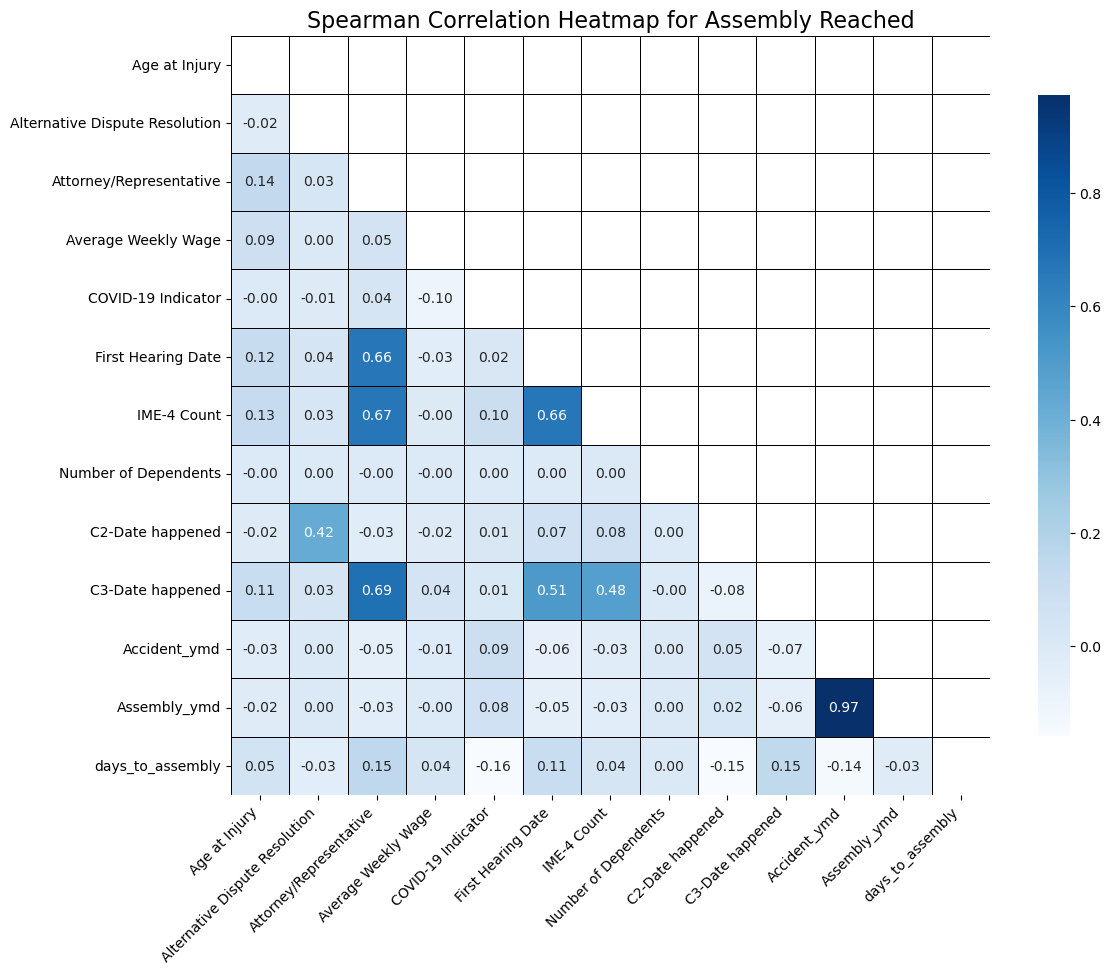

In [184]:
def cor_heatmap(cor, title='Correlation Heatmap', cmap='Reds'):
    mask = np.triu(np.ones_like(cor, dtype=bool))

    plt.figure(figsize=(12, 10))
    sns.heatmap(data=cor, annot=True, cmap=cmap, fmt='.2f', 
                 mask=mask, linewidths=0.5, linecolor='black', square=True,
                 cbar_kws={"shrink": .8})
    
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

cor_spearman_ar = X_ar_train_num.corr(method='spearman')

cor_heatmap(cor_spearman_ar, title='Spearman Correlation Heatmap for Assembly Reached', cmap='Blues')

#### RandomForestClassifier

In [185]:
model_ar = RandomForestClassifier()
model_ar.fit(X_ar_train, y_ar_train)

importances_ar = model_ar.feature_importances_

feature_importance_df_ar = pd.DataFrame({'Feature': X_ar_train.columns, 'Importance': importances_ar})

feature_importance_df_ar = feature_importance_df_ar.sort_values(by='Importance', ascending=False)

print(feature_importance_df_ar)

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_ar['Feature'], feature_importance_df_ar['Importance'])
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### LightGBM

In [ ]:
d_ar_train = lgb.Dataset(X_ar_train, label=y_ar_train)

params_ar = {
    'objective': 'multiclass',
    'num_class': len(pd.Series(y_ar_train).unique()),  
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt'
}

clf_ar = lgb.train(params_ar, d_ar_train, 100)

importance_df_ar = pd.DataFrame({
    'Feature': X_ar_train.columns,
    'Importance': clf_ar.feature_importance()
}).sort_values(by='Importance', ascending=False)

print(importance_df_ar)

In [ ]:
plt.figure(figsize=(10, 8))
plt.barh(importance_df_ar['Feature'], importance_df_ar['Importance'])
plt.title('Feature Importance from LightGBM Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### Mutual Information

In [ ]:
mi_scores_ar = mutual_info_classif(X_ar_train, y_ar_train)

mi_df_ar = pd.DataFrame({'Feature': X_ar_train.columns, 'MI Score': mi_scores_ar})
mi_df_ar = mi_df_ar.sort_values(by='MI Score', ascending=False).reset_index(drop=True)

print("Mutual Information Scores:\n", mi_df_ar)

#### Recursive Feature Elimination (RFE)

In [ ]:
nof_list_ar = np.arange(1, X_ar_train_num.shape[1] + 1)            
high_score_ar = 0
nof_ar = 0           
train_score_list_ar = []
val_score_list_ar = []

for n in range(len(nof_list_ar)):
    model_ar = RandomForestClassifier(n_estimators=50, max_depth=9, random_state=15) 
    
    rfe_ar = RFE(estimator=model_ar, n_features_to_select=nof_list_ar[n])
    
    X_ar_train_rfe = rfe_ar.fit_transform(X_ar_train_num, y_ar_train)
    X_ar_val_rfe = rfe_ar.transform(X_ar_val_num)
    
    model_ar.fit(X_ar_train_rfe, y_ar_train)
    
    train_score_ar = model_ar.score(X_ar_train_rfe, y_ar_train)
    train_score_list_ar.append(train_score_ar)
    
    val_score_ar = model_ar.score(X_ar_val_rfe, y_ar_val)
    val_score_list_ar.append(val_score_ar)
    
    if val_score_ar >= high_score_ar:
        high_score_ar = val_score_ar
        nof_ar = nof_list_ar[n]

        features_to_select_ar = pd.Series(rfe_ar.support_, index = X_ar_train_num.columns)

print("Optimum number of features: %d" % nof_ar)
print("Score with %d features: %f" % (nof_ar, high_score_ar))
print(f"Features to select: \n{features_to_select_ar}")


#### Lasso Regression

In [ ]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

reg = LassoCV(alphas=np.logspace(-4, 0, 100), cv=5)

reg.fit(X_ar_train_num, y_ar_train)

LassoCV(alphas=array([1.00000000e-04, 1.09749877e-04, 1.20450354e-04, 1.32194115e-04,
       1.45082878e-04, 1.59228279e-04, 1.74752840e-04, 1.91791026e-04,
       2.10490414e-04, 2.31012970e-04, 2.53536449e-04, 2.78255940e-04,
       3.05385551e-04, 3.35160265e-04, 3.67837977e-04, 4.03701726e-04,
       4.43062146e-04, 4.86260158e-04, 5.33669923e-04, 5.85702082e-04,
       6.42807312e-04, 7.05480231e-0...
       1.17681195e-01, 1.29154967e-01, 1.41747416e-01, 1.55567614e-01,
       1.70735265e-01, 1.87381742e-01, 2.05651231e-01, 2.25701972e-01,
       2.47707636e-01, 2.71858824e-01, 2.98364724e-01, 3.27454916e-01,
       3.59381366e-01, 3.94420606e-01, 4.32876128e-01, 4.75081016e-01,
       5.21400829e-01, 5.72236766e-01, 6.28029144e-01, 6.89261210e-01,
       7.56463328e-01, 8.30217568e-01, 9.11162756e-01, 1.00000000e+00]),
        cv=5)

In [ ]:
coef = pd.Series(reg.coef_, index=X_ar_train_num.columns)
coef

Age at Injury                    -0.007330
Alternative Dispute Resolution   -0.000000
Attorney/Representative           0.081297
Average Weekly Wage              -0.153071
COVID-19 Indicator                0.005170
First Hearing Date                0.042426
IME-4 Count                       0.157677
Number of Dependents             -0.000000
C2-Date happened                  0.028320
C3-Date happened                 -0.005320
Accident_ymd                     -0.102351
Assembly_ymd                     -0.000000
days_to_assembly                  0.000000
dtype: float64

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [ ]:
plot_importance(coef,'Lasso')

#### Conclusions

In [186]:
include_variables_ar = ['C3-Date happened', 'C2-Date happened', 'Accident_ymd', 'days_to_assembly', 'Average Weekly Wage', 'IME-4 Count', 'Age at Injury', 'Zip Code', 'Carrier Name', 'WCIO Cause of Injury Code', 'WCIO Part Of Body Code', 'WCIO Nature of Injury Code', 'Attorney/Representative', 'First Hearing Date', 'Carrier Type', 'District Name', 'County of Injury', 'Industry Code'] 
discard_variables_ar = ['Alternative Dispute Resolution', 'AgeBracket', 'COVID-19 Indicator', 'Gender', 'Number of Dependents', 'Medical Fee Region', 'Assembly_ymd']

### Model

#### Logistic Regression

In [ ]:
def run_model_LR_ar(X_ar, y_ar):
    model = LogisticRegression(solver='saga', max_iter=5000)

    model.fit(X_ar, y_ar)

    return model

In [ ]:
def evaluate_model(X_ar,y_ar, model):
    return model.score(X_ar,y_ar)

In [ ]:
def avg_score_LR_ar(method, X_ar, y_ar, include_variables_ar):
    X_ar = X_ar[include_variables_ar].iloc[:20000]
    y_ar = y_ar[:20000]
    
    score_train_ar = []
    score_test_ar = []
    f1_train_ar = []
    f1_test_ar = []
    
    for train_index, test_index in method.split(X_ar):
        X_ar_train, X_ar_test = X_ar.iloc[train_index], X_ar.iloc[test_index]
        y_ar_train, y_ar_test = y_ar[train_index], y_ar[test_index]
        
        model_ar = run_model_LR_ar(X_ar_train, y_ar_train)
        
        value_train_ar = evaluate_model(X_ar_train, y_ar_train, model_ar)
        value_test_ar = evaluate_model(X_ar_test, y_ar_test, model_ar)
        
        score_train_ar.append(value_train_ar)
        score_test_ar.append(value_test_ar)

        y_ar_train_pred = model_ar.predict(X_ar_train)
        y_ar_test_pred = model_ar.predict(X_ar_test)

        f1_train_ar.append(f1_score(y_ar_train, y_ar_train_pred, average='weighted'))
        f1_test_ar.append(f1_score(y_ar_test, y_ar_test_pred, average='weighted'))

    print('Train Accuracy:', np.mean(score_train_ar))
    print('Test Accuracy:', np.mean(score_test_ar))
    print('Train F1 Score:', np.mean(f1_train_ar))
    print('Test F1 Score:', np.mean(f1_test_ar))

In [188]:
rkf = RepeatedKFold(n_splits=6, n_repeats=2, random_state=15)

In [ ]:
avg_score_LR_ar(rkf, X_ar, y_ar, include_variables_ar)

NameError: name 'avg_score_LR_ar' is not defined

#### RandomForestCLassifier

In [ ]:
def run_model_RF_ar(X_ar, y_ar):
    model_ar = RandomForestClassifier(n_estimators=50, max_depth=9, random_state=15)
    model_ar.fit(X_ar, y_ar)
    return model_ar

def evaluate_model_ar(X_ar, y_ar, model_ar):
    return model_ar.score(X_ar, y_ar)

def avg_score_RF_ar(method, X_ar, y_ar, include_variables_ar):

    X_ar = X_ar[include_variables_ar].iloc[:20000]
    y_ar = y_ar[:20000]  
    
    score_train_ar = []
    score_test_ar = []
    f1_train_ar = []
    f1_test_ar = []
    
    for train_index, test_index in method.split(X_ar):
        X_ar_train, X_ar_test = X_ar.iloc[train_index], X_ar.iloc[test_index]
        y_ar_train, y_ar_test = y_ar[train_index], y_ar[test_index]
        
        model_ar = run_model_RF_ar(X_ar_train, y_ar_train)
        
        value_train_ar = evaluate_model_ar(X_ar_train, y_ar_train, model_ar)
        value_test_ar = evaluate_model_ar(X_ar_test, y_ar_test, model_ar)
        
        score_train_ar.append(value_train_ar)
        score_test_ar.append(value_test_ar)

        y_ar_train_pred = model_ar.predict(X_ar_train)
        y_ar_test_pred = model_ar.predict(X_ar_test)

        f1_train_ar.append(f1_score(y_ar_train, y_ar_train_pred, average='weighted'))
        f1_test_ar.append(f1_score(y_ar_test, y_ar_test_pred, average='weighted'))

    print('Train Accuracy:', np.mean(score_train_ar))
    print('Test Accuracy:', np.mean(score_test_ar))
    print('Train F1 Score:', np.mean(f1_train_ar))
    print('Test F1 Score:', np.mean(f1_test_ar))


avg_score_RF_ar(rkf, X_ar, y_ar, include_variables_ar)

#### HistGradientBoostingClassifier

In [189]:
def run_model_HGB_ar(X_ar, y_ar):
    model_ar = HistGradientBoostingClassifier(max_iter=500, max_depth=7, random_state=15)
    model_ar.fit(X_ar, y_ar)
    return model_ar

def evaluate_model_ar(X_ar, y_ar, model_ar):
    return model_ar.score(X_ar, y_ar)

def avg_score_HGB_ar(method, X_ar, y_ar, include_variables_ar):

    X_ar = X_ar[include_variables_ar].iloc[:20000]
    y_ar = y_ar[:20000]  
    
    score_train_ar = []
    score_test_ar = []
    f1_train_ar = []
    f1_test_ar = []
    
    for train_index, test_index in method.split(X_ar):
        X_ar_train, X_ar_test = X_ar.iloc[train_index], X_ar.iloc[test_index]
        y_ar_train, y_ar_test = y_ar[train_index], y_ar[test_index]
        
        model_ar = run_model_HGB_ar(X_ar_train, y_ar_train)
        
        value_train_ar = evaluate_model_ar(X_ar_train, y_ar_train, model_ar)
        value_test_ar = evaluate_model_ar(X_ar_test, y_ar_test, model_ar)
        
        score_train_ar.append(value_train_ar)
        score_test_ar.append(value_test_ar)

        y_ar_train_pred = model_ar.predict(X_ar_train)
        y_ar_test_pred = model_ar.predict(X_ar_test)

        f1_train_ar.append(f1_score(y_ar_train, y_ar_train_pred, average='weighted'))
        f1_test_ar.append(f1_score(y_ar_test, y_ar_test_pred, average='weighted'))

    print('Train Accuracy:', np.mean(score_train_ar))
    print('Test Accuracy:', np.mean(score_test_ar))
    print('Train F1 Score:', np.mean(f1_train_ar))
    print('Test F1 Score:', np.mean(f1_test_ar))


avg_score_HGB_ar(rkf, X_ar, y_ar, include_variables_ar)

c:\Users\tomas\anaconda3\envs\DM2425\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\tomas\anaconda3\envs\DM2425\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Train Accuracy: 0.9564549792647493
Test Accuracy: 0.9400002912708788
Train F1 Score: 0.9477572028496958
Test F1 Score: 0.9252386864455863


##### With full X_ar

In [190]:
def avg_score_HGB_ar(method, X_ar, y_ar, include_variables_ar):

    X_ar = X_ar[include_variables_ar]
    
    score_train_ar = []
    score_test_ar = []
    f1_train_ar = []
    f1_test_ar = []
    
    for train_index, test_index in method.split(X_ar):
        X_ar_train, X_ar_test = X_ar.iloc[train_index], X_ar.iloc[test_index]
        y_ar_train, y_ar_test = y_ar[train_index], y_ar[test_index]
        
        model_ar = run_model_HGB_ar(X_ar_train, y_ar_train)
        
        value_train_ar = evaluate_model_ar(X_ar_train, y_ar_train, model_ar)
        value_test_ar = evaluate_model_ar(X_ar_test, y_ar_test, model_ar)
        
        score_train_ar.append(value_train_ar)
        score_test_ar.append(value_test_ar)

        y_ar_train_pred = model_ar.predict(X_ar_train)
        y_ar_test_pred = model_ar.predict(X_ar_test)

        f1_train_ar.append(f1_score(y_ar_train, y_ar_train_pred, average='weighted'))
        f1_test_ar.append(f1_score(y_ar_test, y_ar_test_pred, average='weighted'))

    print('Train Accuracy:', np.mean(score_train_ar))
    print('Test Accuracy:', np.mean(score_test_ar))
    print('Train F1 Score:', np.mean(f1_train_ar))
    print('Test F1 Score:', np.mean(f1_test_ar))


avg_score_HGB_ar(rkf, X_ar, y_ar, include_variables_ar)

Train Accuracy: 0.9601388498682232
Test Accuracy: 0.9593002969628325
Train F1 Score: 0.9473987283039002
Test F1 Score: 0.9462207812553287


In [191]:
def run_model_HGB_ar(X_ar, y_ar):
    model_ar = HistGradientBoostingClassifier(max_iter=500, max_depth=7, random_state=15)
    model_ar.fit(X_ar, y_ar)
    return model_ar

def evaluate_model_ar(X_ar, y_ar, model_ar):
    return model_ar.score(X_ar, y_ar)

def avg_score_HGB_ar(method, X_ar, y_ar, include_variables_ar):

    X_ar = X_ar[include_variables_ar].iloc[:20000]
    y_ar = y_ar[:20000]  
    
    score_train_ar = []
    score_test_ar = []
    f1_train_ar = []
    f1_test_ar = []
    
    for train_index, test_index in method.split(X_ar):
        X_ar_train, X_ar_test = X_ar.iloc[train_index], X_ar.iloc[test_index]
        y_ar_train, y_ar_test = y_ar[train_index], y_ar[test_index]
        
        model_ar = run_model_HGB_ar(X_ar_train, y_ar_train)
        
        value_train_ar = evaluate_model_ar(X_ar_train, y_ar_train, model_ar)
        value_test_ar = evaluate_model_ar(X_ar_test, y_ar_test, model_ar)
        
        score_train_ar.append(value_train_ar)
        score_test_ar.append(value_test_ar)

        y_ar_train_pred = model_ar.predict(X_ar_train)
        y_ar_test_pred = model_ar.predict(X_ar_test)

        f1_train_ar.append(f1_score(y_ar_train, y_ar_train_pred, average='weighted'))
        f1_test_ar.append(f1_score(y_ar_test, y_ar_test_pred, average='weighted'))

    print('Train Accuracy:', np.mean(score_train_ar))
    print('Test Accuracy:', np.mean(score_test_ar))
    print('Train F1 Score:', np.mean(f1_train_ar))
    print('Test F1 Score:', np.mean(f1_test_ar))


avg_score_HGB_ar(rkf, X_ar, y_ar, include_variables_ar)

Train Accuracy: 0.9564549792647493
Test Accuracy: 0.9400002912708788
Train F1 Score: 0.9477572028496958
Test F1 Score: 0.9252386864455863


## Neural Networks

In [258]:
def run_model_NN_ar(X_ar, y_ar):
    model_ar = MLPClassifier(max_iter=300, hidden_layer_sizes = 100)
    model_ar.fit(X_ar, y_ar)
    return model_ar

def evaluate_model_ar(X_ar, y_ar, model_ar):
    return model_ar.score(X_ar, y_ar)

def avg_score_NN_ar(method, X_ar, y_ar, include_variables_ar):

    X_ar = X_ar[include_variables_ar].iloc[:20000]
    y_ar = y_ar[:20000]  
    
    score_train_ar = []
    score_test_ar = []
    f1_train_ar = []
    f1_test_ar = []
    
    for train_index, test_index in method.split(X_ar):
        X_ar_train, X_ar_test = X_ar.iloc[train_index], X_ar.iloc[test_index]
        y_ar_train, y_ar_test = y_ar[train_index], y_ar[test_index]
        
        model_ar = run_model_NN_ar(X_ar_train, y_ar_train)
        
        value_train_ar = evaluate_model_ar(X_ar_train, y_ar_train, model_ar)
        value_test_ar = evaluate_model_ar(X_ar_test, y_ar_test, model_ar)
        
        score_train_ar.append(value_train_ar)
        score_test_ar.append(value_test_ar)

        y_ar_train_pred = model_ar.predict(X_ar_train)
        y_ar_test_pred = model_ar.predict(X_ar_test)

        f1_train_ar.append(f1_score(y_ar_train, y_ar_train_pred, average='weighted'))
        f1_test_ar.append(f1_score(y_ar_test, y_ar_test_pred, average='weighted'))

    print('Train Accuracy:', np.mean(score_train_ar))
    print('Test Accuracy:', np.mean(score_test_ar))
    print('Train F1 Score:', np.mean(f1_train_ar))
    print('Test F1 Score:', np.mean(f1_test_ar))


avg_score_NN_ar(rkf, X_ar, y_ar, include_variables_ar)

Train Accuracy: 0.8641870985333204
Test Accuracy: 0.8643148732989676
Train F1 Score: 0.8316515213428343
Test F1 Score: 0.8317635846130909


### Final Agreement Reached Model

In [192]:
final_model_ar = run_model_HGB_ar(X_ar[include_variables_ar], y_ar)

## Treating Test Data

Before applying the HistGradientBoostingClassifier to the test data, we had to ensure that the test data was preprocessed in the same way as the data used to train the model. This included ensuring that the same features were present, treating missing values and any necessary transformations (such as encoding or scaling) were applied to the test set to match the training set.

In [193]:
df_test = pd.read_csv('test_data.csv')

In [194]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387975 entries, 0 to 387974
Data columns (total 30 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       385531 non-null  object 
 1   Age at Injury                       387975 non-null  int64  
 2   Alternative Dispute Resolution      387975 non-null  object 
 3   Assembly Date                       387975 non-null  object 
 4   Attorney/Representative             387975 non-null  object 
 5   Average Weekly Wage                 368771 non-null  float64
 6   Birth Year                          368505 non-null  float64
 7   C-2 Date                            378841 non-null  object 
 8   C-3 Date                            85216 non-null   object 
 9   Carrier Name                        387975 non-null  object 
 10  Carrier Type                        387975 non-null  object 
 11  Claim Identifier          

In [195]:
df_test.isnull().mean()

Accident Date                         0.006299
Age at Injury                         0.000000
Alternative Dispute Resolution        0.000000
Assembly Date                         0.000000
Attorney/Representative               0.000000
Average Weekly Wage                   0.049498
Birth Year                            0.050184
C-2 Date                              0.023543
C-3 Date                              0.780357
Carrier Name                          0.000000
Carrier Type                          0.000000
Claim Identifier                      0.000000
County of Injury                      0.000000
COVID-19 Indicator                    0.000000
District Name                         0.000000
First Hearing Date                    0.889096
Gender                                0.000000
IME-4 Count                           0.909146
Industry Code                         0.019939
Industry Code Description             0.019939
Medical Fee Region                    0.000000
OIICS Nature 

In [196]:
keep_identifier = df_test['Claim Identifier'].copy()

### Test Data Missing Values

In [197]:
def preprocess_test_data(df_test):

    df_test = df_test.drop(columns=[
        'Birth Year', 'Industry Code Description', 
        'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 
        'WCIO Part Of Body Description', 'OIICS Nature of Injury Description'
    ])

    
    for date_col in ['Accident Date', 'Assembly Date', 'C-2 Date']:
        df_test[date_col] = pd.to_datetime(df_test[date_col], errors='coerce')


    df_test['Accident Date'] = df_test.apply(
        lambda row: row['Assembly Date'] - pd.Timedelta(days=average_days_to_assembly) 
        if pd.isnull(row['Accident Date']) else row['Accident Date'], 
        axis=1
    )


    df_test['Alternative Dispute Resolution'] = df_test['Alternative Dispute Resolution'].replace('U', ADR_mode)


    df_test['Average Weekly Wage'].replace(0, np.nan, inplace=True)
    df_test['Average Weekly Wage'] = df_test.apply(fill_wage, axis=1)

    
    df_test['C2-Date happened'] = df_test['C-2 Date'].apply(lambda x: 0 if pd.isnull(x) else 1)
    df_test = df_test.drop(columns=['C-2 Date'])

    df_test['C3-Date happened'] = df_test['C-3 Date'].apply(lambda x: 0 if pd.isnull(x) else 1)
    df_test = df_test.drop(columns=['C-3 Date'])
    
    df_test['County of Injury'] = df_test.apply(
        lambda row: most_common_county[row['District Name']] 
        if row['County of Injury'] == 'UNKNOWN' else row['County of Injury'], 
        axis=1
    )

    
    df_test['First Hearing Date'] = df_test['First Hearing Date'].apply(lambda x: 1 if pd.notna(x) else 0)

    
    df_test['IME-4 Count'] = df_test['IME-4 Count'].apply(lambda x: 0 if pd.isna(x) else x)


    df_test['Industry Code'] = df_test.apply(fill_industry_code, axis=1)

    
    df_test['Medical Fee Region'] = df_test.apply(
        lambda row: most_common_fee_region[row['County of Injury']] 
        if row['Medical Fee Region'] == 'UK' else row['Medical Fee Region'], 
        axis=1
    )

    
    df_test['WCIO Cause of Injury Code'] = df_test.apply(fill_wcicause, axis=1)
    df_test['WCIO Nature of Injury Code'] = df_test.apply(fill_wcionature, axis=1)
    df_test['WCIO Part Of Body Code'] = df_test.apply(fill_wciopart, axis=1)

    
    df_test['Zip Code'] = df_test['Zip Code'].astype(str)
    df_test['Zip Code'] = df_test.apply(fill_zip, axis=1)

    df_test = df_test.fillna(0)

    columns_to_convert_to_int = [
        'Age at Injury', 'IME-4 Count', 'Industry Code', 
        'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 
        'WCIO Part Of Body Code', 'Number of Dependents'
    ]
    df_test[columns_to_convert_to_int] = df_test[columns_to_convert_to_int].astype('Int64')

   
    date_columns = ['Accident Date', 'Assembly Date']
    for col in date_columns:
        df_test[f'{col}_year'] = df_test[col].dt.year
        df_test[f'{col}_month'] = df_test[col].dt.month
        df_test[f'{col}_day'] = df_test[col].dt.day


    for col in date_columns:
        col_name = col.split(' ')[0]  
        ymd_col = f'{col_name}_ymd'
        df_test[ymd_col] = (df_test[f'{col}_year'] * 10000 + 
                            df_test[f'{col}_month'] * 100 + 
                            df_test[f'{col}_day'])


    df_test = df_test.drop(columns=[
        'Accident Date', 'Assembly Date', 
        'Accident Date_year', 'Accident Date_month', 'Accident Date_day',
        'Assembly Date_year', 'Assembly Date_month', 'Assembly Date_day',
    ])

    df_test.set_index('Claim Identifier', inplace=True)
    
    return df_test

In [198]:
df_test = preprocess_test_data(df_test)

C:\Users\tomas\AppData\Local\Temp\ipykernel_31376\2700576973.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Average Weekly Wage'].replace(0, np.nan, inplace=True)


In [199]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387975 entries, 6165911 to 6553594
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Age at Injury                   387975 non-null  Int64  
 1   Alternative Dispute Resolution  387975 non-null  object 
 2   Attorney/Representative         387975 non-null  object 
 3   Average Weekly Wage             387975 non-null  float64
 4   Carrier Name                    387975 non-null  object 
 5   Carrier Type                    387975 non-null  object 
 6   County of Injury                387975 non-null  object 
 7   COVID-19 Indicator              387975 non-null  object 
 8   District Name                   387975 non-null  object 
 9   First Hearing Date              387975 non-null  int64  
 10  Gender                          387975 non-null  object 
 11  IME-4 Count                     387975 non-null  Int64  
 12  Industry Code 

In [200]:
df_test.isnull().mean()

Age at Injury                     0.0
Alternative Dispute Resolution    0.0
Attorney/Representative           0.0
Average Weekly Wage               0.0
Carrier Name                      0.0
Carrier Type                      0.0
County of Injury                  0.0
COVID-19 Indicator                0.0
District Name                     0.0
First Hearing Date                0.0
Gender                            0.0
IME-4 Count                       0.0
Industry Code                     0.0
Medical Fee Region                0.0
WCIO Cause of Injury Code         0.0
WCIO Nature of Injury Code        0.0
WCIO Part Of Body Code            0.0
Zip Code                          0.0
Number of Dependents              0.0
C2-Date happened                  0.0
C3-Date happened                  0.0
Accident_ymd                      0.0
Assembly_ymd                      0.0
dtype: float64

### Age Outliers

In [201]:
df_test['Age at Injury'].describe()

count     387975.0
mean     41.414944
std      14.501056
min            0.0
25%           30.0
50%           40.0
75%           53.0
max          114.0
Name: Age at Injury, dtype: Float64

In [202]:
def replace_age_outliers(df_test, df_before_scalenc):
    mean_age_before_scalenc = df_before_scalenc['Age at Injury'].mean()
    mean_age_before_scalenc_rounded = round(mean_age_before_scalenc)

    outliers_mask_test = (df_test['Age at Injury'] < 16) | (df_test['Age at Injury'] > 90)
    
    df_test.loc[outliers_mask_test, 'Age at Injury'] = mean_age_before_scalenc_rounded

    return df_test

In [203]:
df_test = replace_age_outliers(df_test, df_before_scalenc)

In [204]:
df_test['Age at Injury'].describe()

count     387975.0
mean     41.727441
std       13.85799
min           16.0
25%           30.0
50%           41.0
75%           53.0
max           90.0
Name: Age at Injury, dtype: Float64

### Add Features

In [205]:
def create_features_test_data(df_test):
    
    bins = [16, 25, 35, 45, 55, 65, 90]  
    labels = ['16-24', '25-34', '35-44', '45-54', '55-64', '65+']
    df_test['AgeBracket'] = pd.cut(df_test['Age at Injury'], bins=bins, labels=labels, right=False)

    
    df_test['days_to_assembly'] = df_test['Assembly_ymd'] - df_test['Accident_ymd']
    
    return df_test

In [206]:
df_test = create_features_test_data(df_test)

In [207]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387975 entries, 6165911 to 6553594
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   Age at Injury                   387975 non-null  Int64   
 1   Alternative Dispute Resolution  387975 non-null  object  
 2   Attorney/Representative         387975 non-null  object  
 3   Average Weekly Wage             387975 non-null  float64 
 4   Carrier Name                    387975 non-null  object  
 5   Carrier Type                    387975 non-null  object  
 6   County of Injury                387975 non-null  object  
 7   COVID-19 Indicator              387975 non-null  object  
 8   District Name                   387975 non-null  object  
 9   First Hearing Date              387975 non-null  int64   
 10  Gender                          387975 non-null  object  
 11  IME-4 Count                     387975 non-null  Int64   
 12  

### Apply the Agreement Reached Model

In [208]:
df_test_ar = df_test.copy()

In [209]:
def encode_test_data_ar(df_test_ar, target_encoder_ar):

    categorical_columns = [
    'Alternative Dispute Resolution',
    'Attorney/Representative',
    'Carrier Name',
    'Carrier Type',
    'County of Injury',
    'COVID-19 Indicator',
    'District Name',
    'Gender',
    'Medical Fee Region',
    'Zip Code',
    'AgeBracket'
]
    
    df_test_ar[categorical_columns] = target_encoder_ar.transform(df_test_ar[categorical_columns])

    return df_test_ar

In [210]:
df_test_ar = encode_test_data_ar(df_test_ar, target_encoder_ar)

In [211]:
df_test_ar.head()

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,...,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Number of Dependents,C2-Date happened,C3-Date happened,Accident_ymd,Assembly_ymd,AgeBracket,days_to_assembly
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6165911,19,0.043435,0.0044,1325.713939,0.063124,0.056723,0.059907,0.04448,0.050828,0,...,10,54,0.045734,1,1,0,20221224,20230102,0.028247,8878
6166141,19,0.043435,0.0044,811.409442,0.044898,0.056723,0.062405,0.04448,0.050828,0,...,10,10,0.068100,1,1,0,20221120,20230102,0.028247,8982
6165907,59,0.043435,0.0044,919.823256,0.100503,0.056723,0.038490,0.04448,0.050828,0,...,49,62,0.017730,0,1,0,20221226,20230102,0.047757,8876
6166047,55,0.043435,0.0044,1325.713939,0.040211,0.056723,0.062405,0.04448,0.050828,0,...,10,53,0.042913,6,1,0,20221228,20230102,0.047757,8874
6166102,25,0.043435,0.0044,1280.839367,0.043019,0.056723,0.055066,0.04448,0.050828,0,...,40,37,0.057304,5,1,0,20221220,20230102,0.038647,8882


In [212]:
def scale_test_data_ar(df_test_ar, scaler_ar):
    df_test_ar = scaler_ar.transform(df_test_ar)
    df_test_ar = pd.DataFrame(df_test_ar, columns=df_test.columns)
    return df_test_ar

In [213]:
df_test_ar = scale_test_data_ar(df_test_ar, scaler_ar)

In [214]:
df_test_ar.head()

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,...,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Number of Dependents,C2-Date happened,C3-Date happened,Accident_ymd,Assembly_ymd,AgeBracket,days_to_assembly
0,0.040541,1.0,0.0,0.291721,0.167116,0.522132,0.947002,1.0,1.0,0.0,...,0.100000,0.583333,0.210008,0.166667,1.0,0.0,0.999916,1.41983,0.000000,0.125388
1,0.040541,1.0,0.0,0.162647,0.118863,0.522132,1.000000,1.0,1.0,0.0,...,0.100000,0.175926,0.312711,0.166667,1.0,0.0,0.998454,1.41983,0.000000,0.126857
2,0.581081,1.0,0.0,0.189856,0.266073,0.522132,0.492663,1.0,1.0,0.0,...,0.533333,0.657407,0.081417,0.000000,1.0,0.0,0.999944,1.41983,0.769494,0.125360
3,0.527027,1.0,0.0,0.291721,0.106456,0.522132,1.000000,1.0,1.0,0.0,...,0.100000,0.574074,0.197052,1.000000,1.0,0.0,0.999972,1.41983,0.769494,0.125332
4,0.121622,1.0,0.0,0.280459,0.113888,0.522132,0.844320,1.0,1.0,0.0,...,0.433333,0.425926,0.263136,0.833333,1.0,0.0,0.999859,1.41983,0.410181,0.125445


In [215]:
df_test_ar = df_test_ar[include_variables_ar]

In [216]:
X_test_ar = df_test_ar[include_variables_ar]

predictions = final_model_ar.predict(X_test_ar)

df_test['Agreement Reached'] = predictions

In [217]:
df_test['Agreement Reached'].value_counts()

Agreement Reached
0    328263
1     59712
Name: count, dtype: int64

#### Encoding and Scaling Test Data

In [218]:
cols = df_test.columns.tolist()
cols.insert(18, cols.pop(cols.index('Agreement Reached')))
df_test = df_test[cols]

In [219]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387975 entries, 6165911 to 6553594
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   Age at Injury                   387975 non-null  Int64   
 1   Alternative Dispute Resolution  387975 non-null  object  
 2   Attorney/Representative         387975 non-null  object  
 3   Average Weekly Wage             387975 non-null  float64 
 4   Carrier Name                    387975 non-null  object  
 5   Carrier Type                    387975 non-null  object  
 6   County of Injury                387975 non-null  object  
 7   COVID-19 Indicator              387975 non-null  object  
 8   District Name                   387975 non-null  object  
 9   First Hearing Date              387975 non-null  int64   
 10  Gender                          387975 non-null  object  
 11  IME-4 Count                     387975 non-null  Int64   
 12  

In [220]:
def encode_test_data(df_test, target_encoder):

    categorical_columns = [
    'Alternative Dispute Resolution',
    'Attorney/Representative',
    'Carrier Name',
    'Carrier Type',
    'County of Injury',
    'COVID-19 Indicator',
    'District Name',
    'Gender',
    'Medical Fee Region',
    'Zip Code',
    'AgeBracket'
]
    
    df_test[categorical_columns] = target_encoder.transform(df_test[categorical_columns])

    return df_test

In [221]:
df_test = encode_test_data(df_test, target_encoder)

In [222]:
df_test.head()

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,...,WCIO Part Of Body Code,Zip Code,Agreement Reached,Number of Dependents,C2-Date happened,C3-Date happened,Accident_ymd,Assembly_ymd,AgeBracket,days_to_assembly
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6165911,19,1.897742,1.454582,1325.713939,1.798536,1.793963,1.947234,1.911608,1.917391,0,...,54,1.971856,0,1,1,0,20221224,20230102,1.554529,8878
6166141,19,1.897742,1.454582,811.409442,1.921544,1.793963,1.993328,1.911608,1.917391,0,...,10,2.121147,0,1,1,0,20221120,20230102,1.554529,8982
6165907,59,1.897742,1.454582,919.823256,1.864322,1.793963,1.820681,1.911608,1.917391,0,...,62,1.712766,0,0,1,0,20221226,20230102,1.987389,8876
6166047,55,1.897742,1.454582,1325.713939,1.788521,1.793963,1.993328,1.911608,1.917391,0,...,53,2.197659,0,6,1,0,20221228,20230102,1.987389,8874
6166102,25,1.897742,1.454582,1280.839367,1.441961,1.793963,2.008898,1.911608,1.917391,0,...,37,2.005246,0,5,1,0,20221220,20230102,1.796649,8882


In [223]:
def scale_test_data(df_test, scaler):
    df_test_cols = df_test.columns
    df_test = scaler.transform(df_test)
    df_test = pd.DataFrame(df_test, columns=df_test_cols)

    return df_test

In [224]:
df_test = scale_test_data(df_test, scaler)

In [225]:
df_test.head()

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,...,WCIO Part Of Body Code,Zip Code,Agreement Reached,Number of Dependents,C2-Date happened,C3-Date happened,Accident_ymd,Assembly_ymd,AgeBracket,days_to_assembly
0,0.040541,1.0,0.0,0.291721,0.461087,0.725037,0.792261,1.0,0.229493,0.0,...,0.583333,0.483635,0.0,0.166667,1.0,0.0,0.999916,1.41983,0.000000,0.125388
1,0.040541,1.0,0.0,0.162647,0.517055,0.725037,0.932793,1.0,0.229493,0.0,...,0.175926,0.564064,0.0,0.166667,1.0,0.0,0.998454,1.41983,0.000000,0.126857
2,0.581081,1.0,0.0,0.189856,0.491020,0.725037,0.406424,1.0,0.229493,0.0,...,0.657407,0.344054,0.0,0.000000,1.0,0.0,0.999944,1.41983,0.978506,0.125360
3,0.527027,1.0,0.0,0.291721,0.456531,0.725037,0.932793,1.0,0.229493,0.0,...,0.574074,0.605284,0.0,1.000000,1.0,0.0,0.999972,1.41983,0.978506,0.125332
4,0.121622,1.0,0.0,0.280459,0.298847,0.725037,0.980262,1.0,0.229493,0.0,...,0.425926,0.501624,0.0,0.833333,1.0,0.0,0.999859,1.41983,0.547327,0.125445


## Applying the model to the test data

In [226]:
df_test_model = df_test[include_variables]

In [227]:
df_test_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387975 entries, 0 to 387974
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age at Injury               387975 non-null  float64
 1   Attorney/Representative     387975 non-null  float64
 2   Average Weekly Wage         387975 non-null  float64
 3   Carrier Name                387975 non-null  float64
 4   First Hearing Date          387975 non-null  float64
 5   IME-4 Count                 387975 non-null  float64
 6   Industry Code               387975 non-null  float64
 7   WCIO Cause of Injury Code   387975 non-null  float64
 8   WCIO Nature of Injury Code  387975 non-null  float64
 9   WCIO Part Of Body Code      387975 non-null  float64
 10  Zip Code                    387975 non-null  float64
 11  Agreement Reached           387975 non-null  float64
 12  C2-Date happened            387975 non-null  float64
 13  C3-Date happen

In [228]:
encoded_predictions = final_model.predict(df_test_model)

In [229]:
df_test['Claim_Injury_Type'] = label_encoder.inverse_transform(encoded_predictions)

In [230]:
df_test['Claim_Injury_Type'].head()

0    2. NON-COMP
1    2. NON-COMP
2    2. NON-COMP
3    2. NON-COMP
4    2. NON-COMP
Name: Claim_Injury_Type, dtype: object

In [231]:
df_test['Claim_Injury_Type'].value_counts()

Claim_Injury_Type
2. NON-COMP        306181
4. TEMPORARY        73157
1. CANCELLED         5121
5. PPD SCH LOSS      3516
Name: count, dtype: int64

In [232]:
submission_df = pd.DataFrame({
    'Claim Identifier': keep_identifier,  
    'Claim Injury Type': df_test['Claim_Injury_Type']
})

submission_df.to_csv('submission.csv', index=False)